In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

# Data beschreibung
https://arxiv.org/pdf/2001.08435.pdf 

In [2]:
df=pd.read_csv("relationship_advise_comments_16.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 54


# General EDA

In [5]:
df.head()

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id
0,0,False,[deleted],t3_5acfgz,t5_2r0cn,NaN,[deleted],1.0,NaN,relationship_advice,1.477959e+09,t3_5acfgz,0,NaN,1.481098e+09,False,d9g55h3
1,0,False,[deleted],t3_5aft7m,t5_2r0cn,NaN,[deleted],2.0,NaN,relationship_advice,1.477959e+09,t3_5aft7m,0,NaN,1.481098e+09,1479146588,d9g561v
2,0,False,[deleted],t3_5afw7x,t5_2r0cn,NaN,[deleted],1.0,NaN,relationship_advice,1.477959e+09,t1_d9g4xvn,0,NaN,1.481098e+09,False,d9g59er
3,0,False,[deleted],t3_5acfgz,t5_2r0cn,NaN,[deleted],4.0,NaN,relationship_advice,1.477959e+09,t1_d9fhz9a,0,NaN,1.481098e+09,False,d9g59oa
4,0,False,It takes time but try to think of all the nega...,t3_5a94bq,t5_2r0cn,NaN,millybilly67,1.0,NaN,relationship_advice,1.477959e+09,t3_5a94bq,0,NaN,1.481098e+09,False,d9g59ru


In [6]:
df.tail()

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id
45459,0,False,That poor woman. You're pathetic.,t3_5fsofq,t5_2r0cn,NaN,queenoftheevildead,2.0,NaN,relationship_advice,1.480549e+09,t3_5fsofq,0,NaN,1.481891e+09,False,damtq14
45460,0,False,"Usually, a guy won't propose unless he knows y...",t3_5ft3h7,t5_2r0cn,NaN,evilholographlincoln,2.0,NaN,relationship_advice,1.480550e+09,t3_5ft3h7,0,NaN,1.481891e+09,False,damu1a6
45461,1,False,Don't give her? How hard is that?,t3_5fs6x6,t5_2r0cn,NaN,Slyver08,0.0,NaN,relationship_advice,1.480550e+09,t3_5fs6x6,0,NaN,1.481892e+09,False,damu4g8
45462,0,False,"OK, good luck!",t3_5eticb,t5_2r0cn,NaN,CoverYourselfInShit,1.0,NaN,relationship_advice,1.480550e+09,t1_dag66hw,0,NaN,1.481892e+09,False,damuavy
45463,0,False,Way different views as some gals don't define ...,t3_5euzvg,t5_2r0cn,NaN,udolipixiegal,1.0,NaN,relationship_advice,1.480550e+09,t1_damsqnb,0,NaN,1.481892e+09,False,damuaxb


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45465 entries, 0 to 45463
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   controversiality        45465 non-null  object 
 1   stickied                45465 non-null  object 
 2   body                    45450 non-null  object 
 3   link_id                 45464 non-null  object 
 4   subreddit_id            45464 non-null  object 
 5   author_flair_css_class  0 non-null      float64
 6   author                  45464 non-null  object 
 7   score                   45464 non-null  float64
 8   author_flair_text       40 non-null     object 
 9   subreddit               45464 non-null  object 
 10  created_utc             45463 non-null  float64
 11  parent_id               45464 non-null  object 
 12  gilded                  45464 non-null  object 
 13  distinguished           7 non-null      object 
 14  retrieved_on            45463 non-null  flo

In [8]:
df.isnull().sum() 

controversiality              0
stickied                      0
body                         15
link_id                       1
subreddit_id                  1
author_flair_css_class    45465
author                        1
score                         1
author_flair_text         45425
subreddit                     1
created_utc                   2
parent_id                     1
gilded                        1
distinguished             45458
retrieved_on                  2
edited                        2
id                            2
dtype: int64

In [9]:
df.columns

Index(['controversiality', 'stickied', 'body', 'link_id', 'subreddit_id',
       'author_flair_css_class', 'author', 'score', 'author_flair_text',
       'subreddit', 'created_utc', 'parent_id', 'gilded', 'distinguished',
       'retrieved_on', 'edited', 'id'],
      dtype='object')

In [10]:
df.describe()

,author_flair_css_class,score,created_utc,retrieved_on
count,0.0,4.546400e+04,4.546300e+04,4.546300e+04
mean,NaN,3.252861e+04,1.479281e+09,1.481509e+09
std,NaN,6.935174e+06,7.702130e+05,2.295780e+05
min,NaN,-9.700000e+01,1.477959e+09,1.481098e+09
25%,NaN,1.000000e+00,1.478598e+09,1.481303e+09
50%,NaN,1.000000e+00,1.479295e+09,1.481519e+09
75%,NaN,2.000000e+00,1.479950e+09,1.481710e+09
max,NaN,1.478738e+09,1.480550e+09,1.481892e+09


# One Feature EDA

# Controversialty

- wenn upvotes fast so groß sind wie downvotes dann ist dies controverse
Bsp.: 
- 1 upvote - 1 downvote = 0 points, but not controversial.
- 2 upvotes - 1 downvote = 1 point, but not controversial.
- 1 upvotes - 2 downvotes = -1 point, but not controversial.
- 11 upvotes - 11 downvotes = 0 points, and controversial.
- 12 upvotes - 11 downvotes = 1 point, and controversial.
- 11 upvotes - 12 downvotes = -1 point, and controversial.
- Source: https://www.reddit.com/r/help/comments/66jycz/how_does_reddit_determine_what_is_controversial/

0            32254
0            12480
1              513
1              217
t3_5c4gmg        1
Name: controversiality, dtype: int64


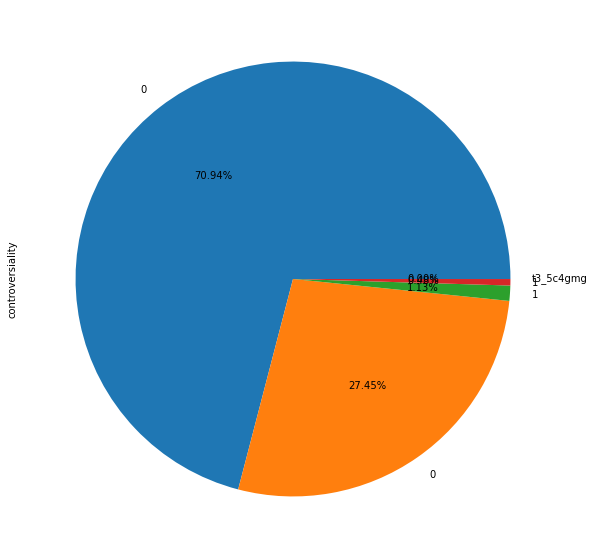

In [11]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Converting Controversialty values and deleting unimportant rows

In [12]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [13]:
excluded_values = ['t3_5c4gmg']

# Zeilen filtern und nur Zeilen behalten, die nicht in der Liste der auszuschließenden Werte sind
df= df[~df['controversiality'].isin(excluded_values)]

In [14]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    44734
1      730
Name: controversiality, dtype: int64


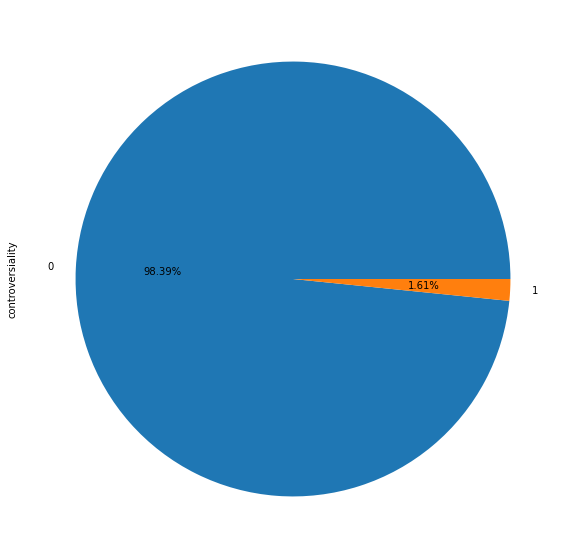

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

Stickied comments stay at the top of the comments list right under the post, doen by Admin
https://www.reddit.com/r/modguide/comments/f7fgd2/all_about_sticky_posts_announcements_and_sticky/
A sticky comment is a comment that is "pinned" to the top of a subreddit's comment section, so that it remains visible even as new comments are added.
https://www.quora.com/How-do-you-make-your-comment-a-sticky-on-Reddit#:~:text=A%20sticky%20comment%20is%20a,where%20the%20comment%20was%20made.

False    32767
False    12697
Name: stickied, dtype: int64


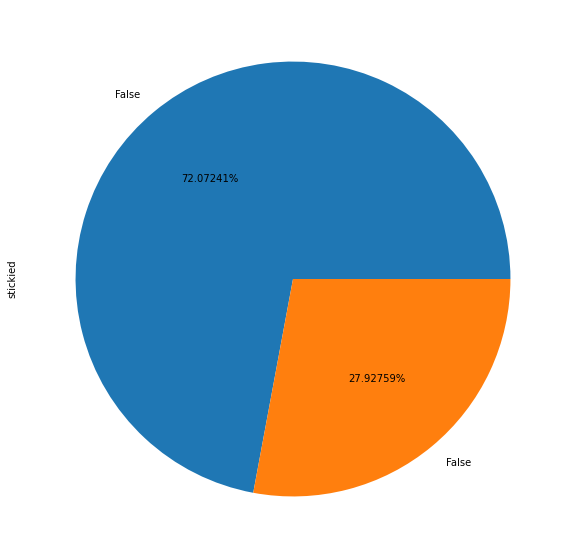

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [17]:
df["stickied"].unique()

array(['False', False], dtype=object)

In [18]:
df[df['stickied'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id


In [19]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace("False", "0")

In [20]:
df["stickied"].unique()

array(['0'], dtype=object)

0    45464
Name: stickied, dtype: int64


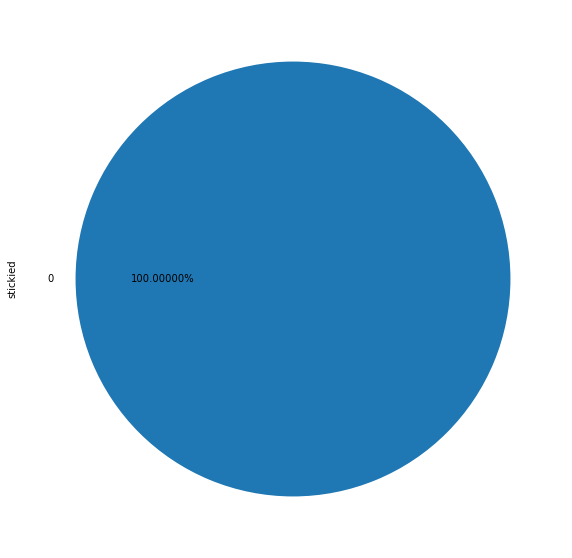

In [21]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# link_id  

Kennung des Beitrags, in dem dieser Kommentar enthalten ist, z. B. "t3 5l954r" (String).

t3_5ff1pn    280
t3_5cd8gz    268
t3_5f4luf    243
t3_5c14eq    216
t3_5esjib    212
            ... 
t3_508jaf      1
t3_5f3z9g      1
t3_5f3qg8      1
t3_5d2ult      1
t3_5ft3h7      1
Name: link_id, Length: 5309, dtype: int64


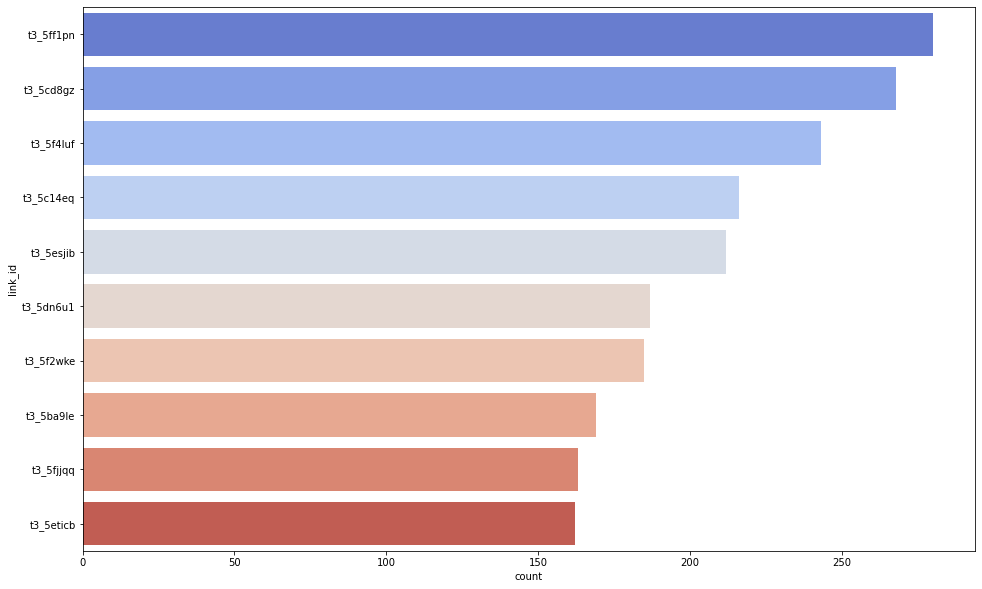

In [22]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [23]:
df[df['link_id'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id
13383,0,0,Thank you for your warm words! I'll try to be ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.dropna(subset=['link_id'], inplace=True)


In [25]:
df[df['link_id'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id


# Subreddit_id 

Die Kennung des Subreddits, in dem der Kommentar gepostet wurde, z. B. "t5 2qh1i" (String).

t5_2r0cn    45463
Name: subreddit_id, dtype: int64


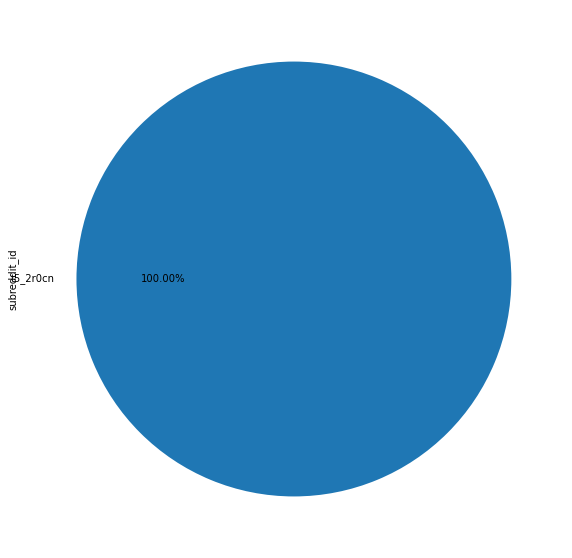

In [26]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [27]:
df[df['link_id'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id


In [28]:
df['link_id'].unique()

array(['t3_5acfgz', 't3_5aft7m', 't3_5afw7x', ..., 't3_5ft2v1',
       't3_5ft2lr', 't3_5ft3h7'], dtype=object)

# Author

the account name of the poster, e.g., “example username” (String).

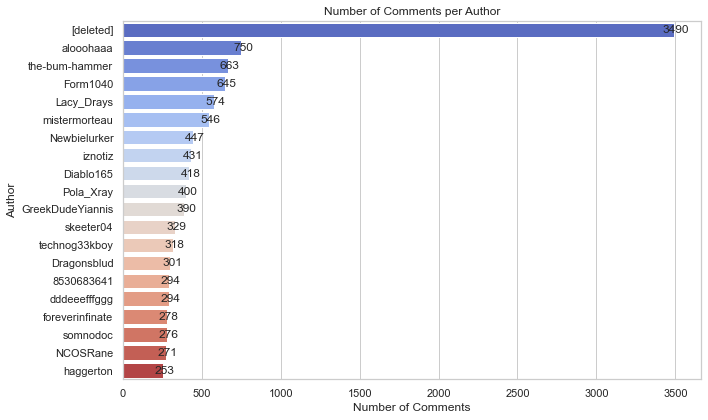

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()

In [30]:
 df[df['author'].str.contains('AutoModerator')]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id


# Author_flair_text

Der Text des Flairs des Autors. Dieses Feld ist spezifisch für subreddit (String).

# NA mit 0 auffüllen

In [31]:
df['author_flair_text'].fillna('0', inplace=True)

0                                           45424
Former victim advocate, CASA-in-training       39
Name: author_flair_text, dtype: int64


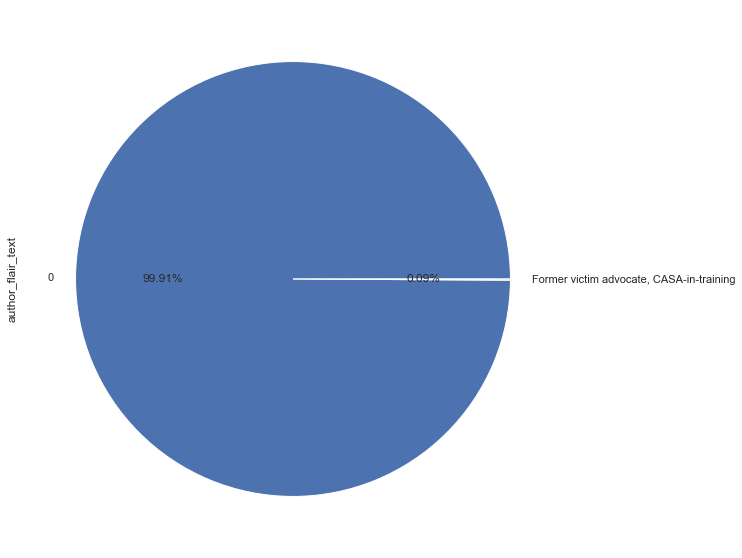

In [32]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 
#kann man löschen

# Subreddit

Name of the subreddit that the comment is posted. Note that it excludes the prefix /r/. E.g., ’AskReddit’ (String).

relationship_advice    45463
Name: subreddit, dtype: int64


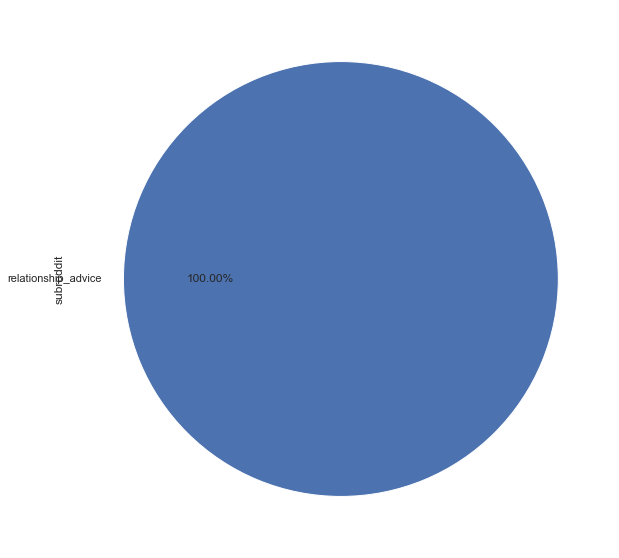

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [34]:
df[df['subreddit'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id


# Created_utc

In [49]:
# Unix-Epoch (1. Januar 1970) als pandas Timestamp
unix_epoch = pd.Timestamp('1970-01-01')

# Multiplikator für die Sekunden in Unix-Zeitstempel
seconds_multiplier = 1  # Hier könntest du 1000 verwenden, wenn die Zeitstempel in Millisekunden sind

# Die Zeitstempel in ein DateTime-Format konvertieren
df['created_utc'] = unix_epoch + df['created_utc'] * pd.to_timedelta(seconds_multiplier, unit='s')

 # Hour

([<matplotlib.axis.XTick at 0x7f9b3236c370>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

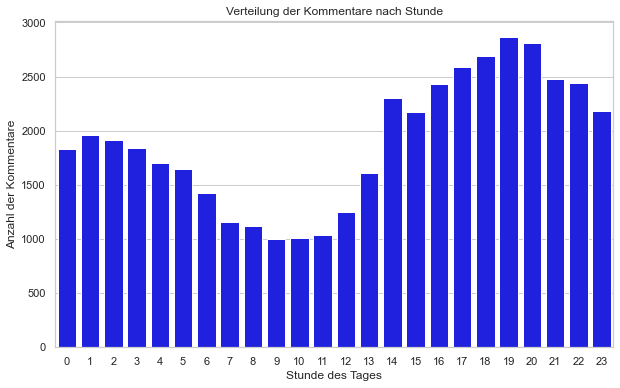

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Day

Text(0, 0.5, 'Anzahl der Kommentare')

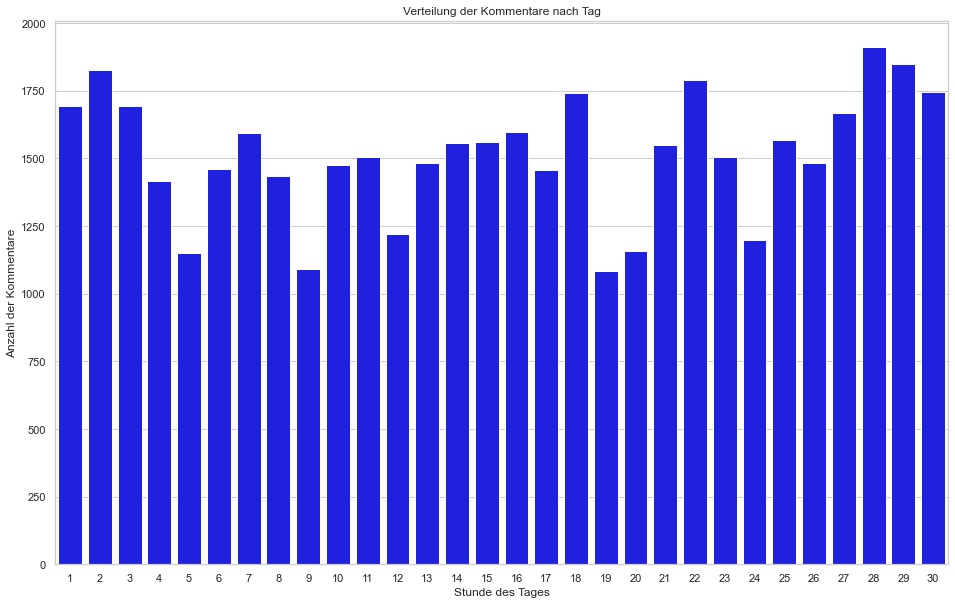

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')


In [37]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year
#zum umändern der Jahre

In [38]:
df.loc[pd.isna(df['created_utc'])]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id,created_hour,created_day,created_year


# parent_id 

Kennung des übergeordneten Kommentars, z. B. die Kennung des Beitrags, wenn es sich um einen Kommentar der obersten Ebene handelt, oder die Kennung eines anderen Kommentars, z. B. "t1 dbu5bpp" (String).
also besser gesagt was was der kommentar antwortet( kann ein Kommentare von einen Kommentar sein oder Kommentar vom Post)

# Gilded

die Anzahl, wie oft dieser Kommentar Reddit Gold erhalten hat, z. B. 0 (Integer)
Es bedeutet, dass der Beitrag von einem anderen Benutzer ausgezeichnet wurde. 
->Die Auszeichnung ist in Form von reddit Silber, Gold oder Platin. 
https://www.reddit.com/r/NoStupidQuestions/comments/amm4da/what_does_a_gild_or_gilded_mean_in_reddit/
also jmd hat echt Geld ausgegeben um dir ein award zu geben. Idee :Der Gedanke dahinter ist, dass, wenn jemand echtes Geld ausgegeben hat, um Ihren Beitrag hervorzuheben, dieser auch gut sein muss.

0    32766
0    12697
Name: gilded, dtype: int64


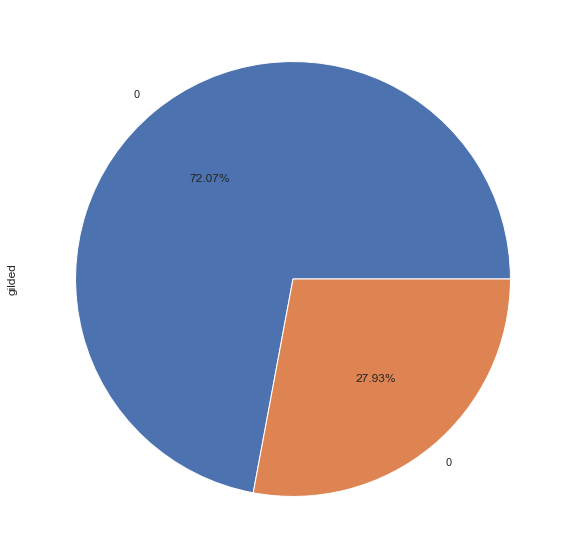

In [39]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())


In [40]:
df['gilded'] = df['gilded'].replace(0,"0")

In [41]:
df["gilded"].unique()

array(['0'], dtype=object)

0    45463
Name: gilded, dtype: int64


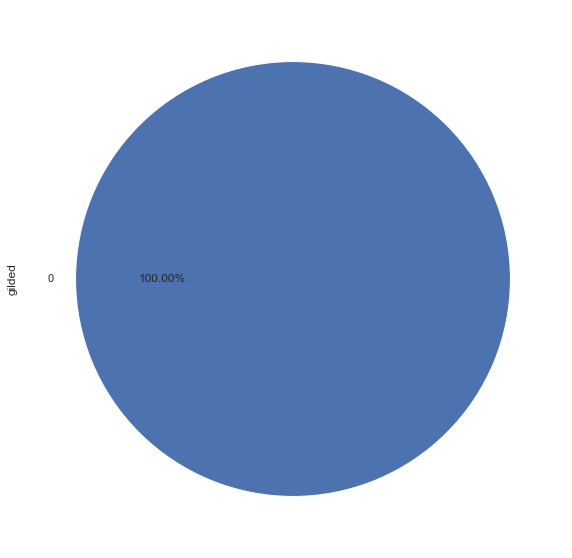

In [42]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

# Distinguished

Kennzeichen, um festzustellen, ob der Kommentar von den Moderatoren ausgezeichnet wird. "null" bedeutet nicht ausgezeichnet4 (String).
oder ob ein Moderator das verfasst hat oder nicht

In [43]:
df['distinguished'].fillna('0', inplace=True)

In [46]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

0            45457
moderator        6
Name: distinguished, dtype: int64


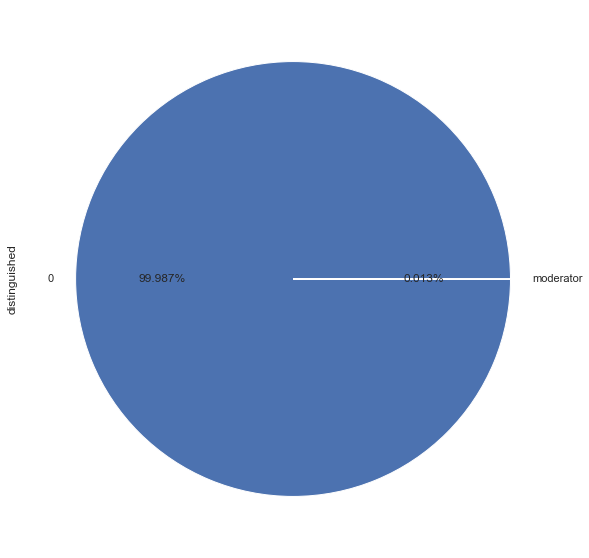

In [47]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [50]:
df[df['distinguished'] == "moderator"]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id,created_hour,created_day,created_year
32536,0,0,This was removed when the gofundme link was ad...,t3_5e24i2,t5_2r0cn,NaN,eganist,103.0,0,relationship_advice,2016-11-22 23:55:27,t3_5e24i2,0,moderator,1.481683e+09,False,dabq8je,23,22,2016
33906,0,0,"I rarely use the mod tag, but I wanted to add ...",t3_5eez5c,t5_2r0cn,NaN,PreviouslySaydrah,341.0,"Former victim advocate, CASA-in-training",relationship_advice,2016-11-23 21:23:42,t3_5eez5c,0,moderator,1.481705e+09,False,dacyqad,21,23,2016
33960,0,0,This is a troll who has been making this exact...,t3_5ejm95,t5_2r0cn,NaN,PreviouslySaydrah,2.0,"Former victim advocate, CASA-in-training",relationship_advice,2016-11-23 22:13:01,t1_dacxtd9,0,moderator,1.481706e+09,False,dad0xn8,22,23,2016
33961,0,0,This is a troll who has been making this exact...,t3_5ejm95,t5_2r0cn,NaN,PreviouslySaydrah,2.0,"Former victim advocate, CASA-in-training",relationship_advice,2016-11-23 22:13:15,t1_dacxeam,0,moderator,1.481706e+09,False,dad0y06,22,23,2016
33962,0,0,This is a troll who has been making this exact...,t3_5ejm95,t5_2r0cn,NaN,PreviouslySaydrah,2.0,"Former victim advocate, CASA-in-training",relationship_advice,2016-11-23 22:13:20,t1_dacz0u2,0,moderator,1.481706e+09,False,dad0y59,22,23,2016
36156,0,0,The outcome is that more will be hurt if you d...,t3_5epgzq,t5_2r0cn,NaN,eganist,3.0,0,relationship_advice,2016-11-25 15:48:07,t1_daejl7h,0,moderator,1.481744e+09,False,daf529x,15,25,2016


# Edited

Kennzeichen, das angibt, ob der Kommentar bearbeitet wurde. Entweder der UNIX-Zeitstempel, an dem der Kommentar bearbeitet wurde, oder "false".

In [51]:
df["edited"].unique()

array(['False', '1479146588', '1479146584', ..., '1480552925',
       '1480547478', '1480544264'], dtype=object)

In [52]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [54]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    43836
1     1627
Name: edited, dtype: int64


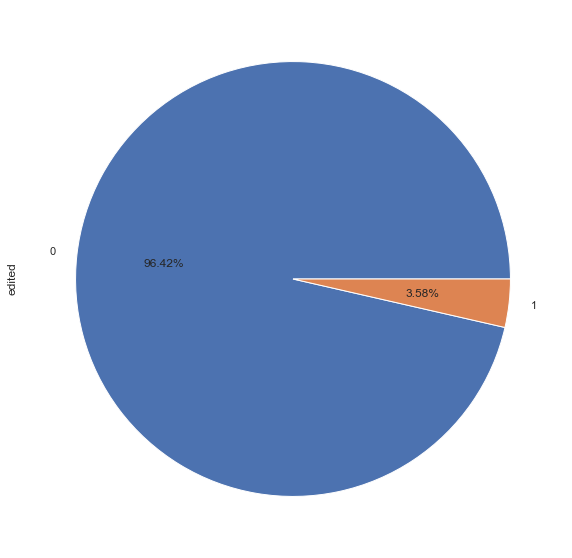

In [53]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())
#Überlegung True und False 

In [55]:
df[df['edited'].isna()]

,controversiality,stickied,body,link_id,subreddit_id,author_flair_css_class,author,score,author_flair_text,subreddit,created_utc,parent_id,gilded,distinguished,retrieved_on,edited,id,created_hour,created_day,created_year


# Score

Die Punktzahl des Kommentars. Die Punktzahl ergibt sich aus der Anzahl der Upvotes minus der Anzahl der Downvotes. Beachten Sie, dass Reddit die tatsächliche Punktzahl verwischt, um Spam-Bots zu verhindern. Z.B., 5 (Ganzzahl).

In [56]:
df['score'] = df["score"].astype(int)

In [57]:
df["score"].value_counts()

 1      21502
 2       8611
 3       3878
 0       2288
 4       1377
        ...  
-40         1
 106        1
-56         1
 231        1
 187        1
Name: score, Length: 229, dtype: int64

In [58]:
df["score"].mean()

3.143655280117898

In [59]:
df.describe()

,author_flair_css_class,score,retrieved_on,created_hour,created_day,created_year
count,0.0,45463.000000,4.546300e+04,45463.000000,45463.000000,45463.0
mean,NaN,3.143655,1.481509e+09,12.780723,15.757451,2016.0
std,NaN,11.886315,2.295780e+05,7.229237,8.916479,0.0
min,NaN,-97.000000,1.481098e+09,0.000000,1.000000,2016.0
25%,NaN,1.000000,1.481303e+09,6.000000,8.000000,2016.0
50%,NaN,1.000000,1.481519e+09,14.000000,16.000000,2016.0
75%,NaN,2.000000,1.481710e+09,19.000000,24.000000,2016.0
max,NaN,860.000000,1.481892e+09,23.000000,30.000000,2016.0


In [60]:
df.isnull().sum() 

controversiality              0
stickied                      0
body                         14
link_id                       0
subreddit_id                  0
author_flair_css_class    45463
author                        0
score                         0
author_flair_text             0
subreddit                     0
created_utc                   0
parent_id                     0
gilded                        0
distinguished                 0
retrieved_on                  0
edited                        0
id                            0
created_hour                  0
created_day                   0
created_year                  0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45463
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   controversiality        45463 non-null  object        
 1   stickied                45463 non-null  object        
 2   body                    45449 non-null  object        
 3   link_id                 45463 non-null  object        
 4   subreddit_id            45463 non-null  object        
 5   author_flair_css_class  0 non-null      float64       
 6   author                  45463 non-null  object        
 7   score                   45463 non-null  int64         
 8   author_flair_text       45463 non-null  object        
 9   subreddit               45463 non-null  object        
 10  created_utc             45463 non-null  datetime64[ns]
 11  parent_id               45463 non-null  object        
 12  gilded                  45463 non-null  object     

# Two Features Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

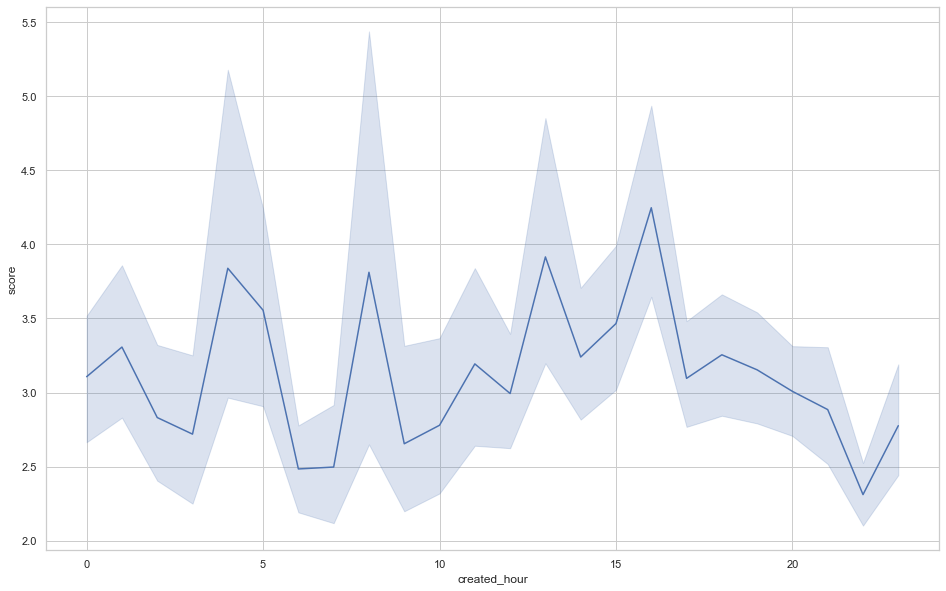

In [62]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

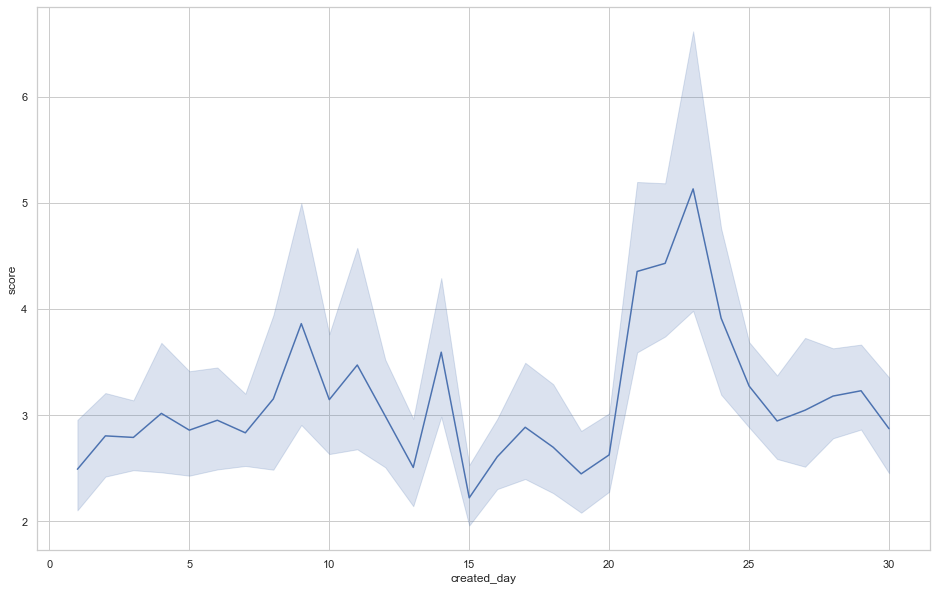

In [63]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

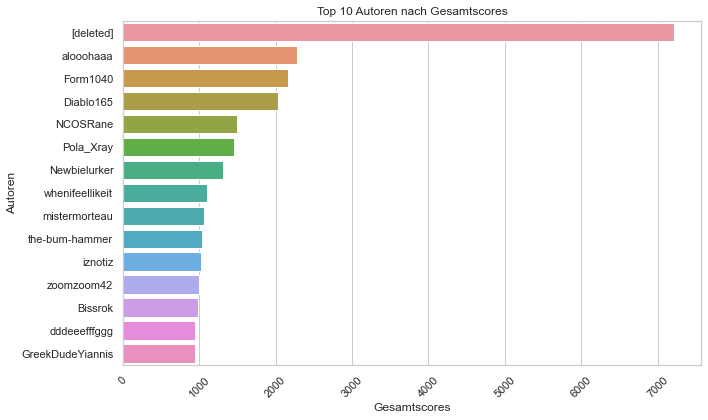

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Gesamtscores')
plt.ylabel('Autoren')
plt.xticks(rotation=45)
plt.tight_layout()


# Ohne deleted

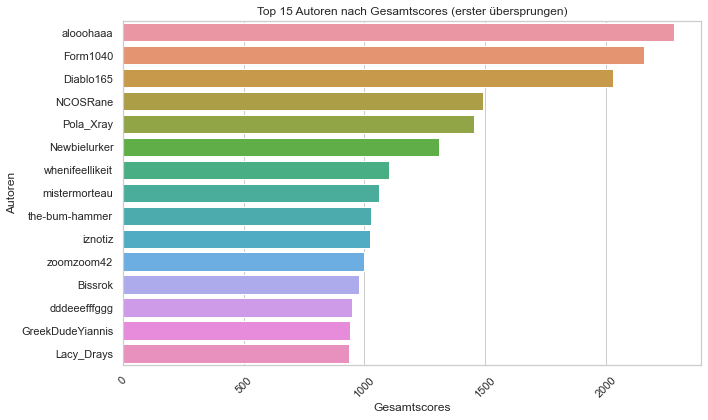

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Gesamtscores')
plt.ylabel('Autoren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Column removing

In [67]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id"], axis = 1)

In [68]:
df.isnull().sum() 

controversiality      0
stickied              0
body                 14
link_id               0
author                0
score                 0
author_flair_text     0
created_utc           0
parent_id             0
gilded                0
distinguished         0
edited                0
id                    0
created_hour          0
created_day           0
created_year          0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45463
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   controversiality   45463 non-null  object        
 1   stickied           45463 non-null  object        
 2   body               45449 non-null  object        
 3   link_id            45463 non-null  object        
 4   author             45463 non-null  object        
 5   score              45463 non-null  int64         
 6   author_flair_text  45463 non-null  object        
 7   created_utc        45463 non-null  datetime64[ns]
 8   parent_id          45463 non-null  object        
 9   gilded             45463 non-null  object        
 10  distinguished      45463 non-null  object        
 11  edited             45463 non-null  object        
 12  id                 45463 non-null  object        
 13  created_hour       45463 non-null  int64         
 14  created_day

# Row deleting

# Delete all Comments that have a NA

In [70]:
df[df['author'] == 'relationship_advice']

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [71]:
df[pd.isna(df['body'])]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
3582,0,0,NaN,t3_5atvqg,throwawayaccount4now,1,0,2016-11-03 01:17:41,t1_d9j9i7w,0,0,1,d9j9p9i,1,3,2016
14136,0,0,NaN,t3_5c7w0e,ElainePorter,1,0,2016-11-10 15:37:33,t1_d9uby1o,0,0,1,d9uexvh,15,10,2016
14363,0,0,NaN,t3_5c9g27,passwordistako,1,0,2016-11-10 18:52:09,t3_5c9g27,0,0,0,d9uoybr,18,10,2016
16256,0,0,NaN,t3_5che3m,pinksleeper,1,0,2016-11-11 22:55:17,t1_d9wh0xg,0,0,1,d9whdup,22,11,2016
16296,0,0,NaN,t3_5che3m,pinksleeper,1,0,2016-11-11 23:24:21,t1_d9whys2,0,0,1,d9wik0e,23,11,2016
16322,0,0,NaN,t3_5che3m,pinksleeper,1,0,2016-11-11 23:40:38,t1_d9wip7j,0,0,1,d9wj7b7,23,11,2016
21130,0,0,NaN,t3_5d1bg9,0inon,-1,0,2016-11-15 07:45:46,t1_da10e3t,0,0,1,da10n2r,7,15,2016
21526,0,0,NaN,t3_5d371u,triddle97,1,0,2016-11-15 16:34:21,t1_da1emz3,0,0,1,da1f1nt,16,15,2016
21534,0,0,NaN,t3_5d371u,triddle97,1,0,2016-11-15 16:36:54,t1_da1ez40,0,0,1,da1f64e,16,15,2016
21552,0,0,NaN,t3_5d371u,triddle97,1,0,2016-11-15 16:48:47,t1_da1fm66,0,0,1,da1fr8c,16,15,2016


In [72]:
df = df.dropna(subset=['body'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45449 entries, 0 to 45463
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   controversiality   45449 non-null  object        
 1   stickied           45449 non-null  object        
 2   body               45449 non-null  object        
 3   link_id            45449 non-null  object        
 4   author             45449 non-null  object        
 5   score              45449 non-null  int64         
 6   author_flair_text  45449 non-null  object        
 7   created_utc        45449 non-null  datetime64[ns]
 8   parent_id          45449 non-null  object        
 9   gilded             45449 non-null  object        
 10  distinguished      45449 non-null  object        
 11  edited             45449 non-null  object        
 12  id                 45449 non-null  object        
 13  created_hour       45449 non-null  int64         
 14  created_day

In [74]:
df.isnull().sum() 

controversiality     0
stickied             0
body                 0
link_id              0
author               0
score                0
author_flair_text    0
created_utc          0
parent_id            0
gilded               0
distinguished        0
edited               0
id                   0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body anylses and Preprocessing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2857
[removed]                                                              

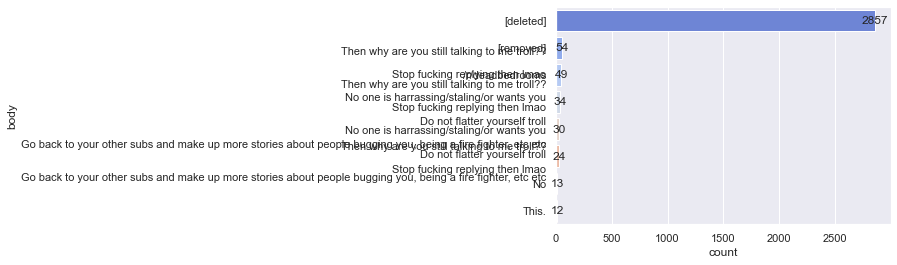

In [75]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [76]:
filtered_df=df[df['body'] == '[removed]']

In [77]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,54.000000,54.00000,54.000000,54.0
mean,3.703704,11.12963,18.537037,2016.0
std,14.925766,6.79913,9.242463,0.0
min,-13.000000,0.00000,1.000000,2016.0
25%,1.000000,6.25000,9.750000,2016.0
50%,1.000000,12.00000,22.000000,2016.0
75%,1.000000,16.00000,25.000000,2016.0
max,85.000000,23.00000,30.000000,2016.0


In [78]:
len(filtered_df)

54

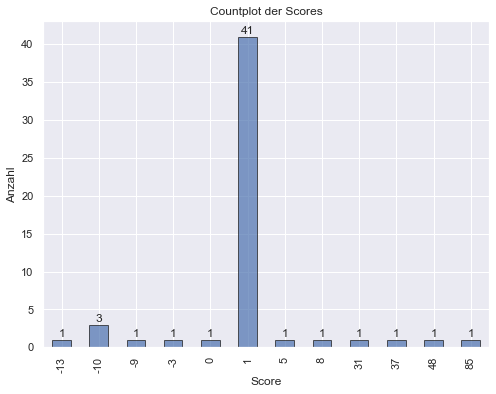

In [79]:
plt.figure(figsize=(8, 6))
counts = filtered_df['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Text(0.5, 1.0, 'Histogramm der Scores')

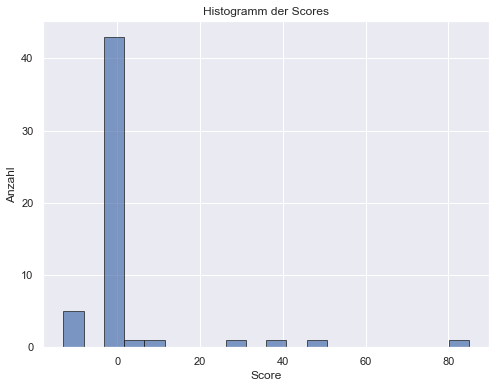

In [80]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['score'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

removed Kommentare löschen

In [81]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2857
/r/deadbedrooms                                                        

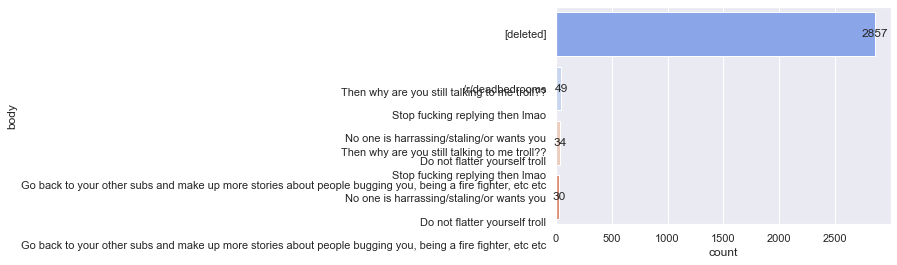

In [84]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:4].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [85]:
filtered_df_del=df[df['body'] == '[deleted]']

In [86]:
filtered_df_del

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
0,0,0,[deleted],t3_5acfgz,[deleted],1,0,2016-11-01 00:02:03,t3_5acfgz,0,0,0,d9g55h3,0,1,2016
1,0,0,[deleted],t3_5aft7m,[deleted],2,0,2016-11-01 00:02:25,t3_5aft7m,0,0,1,d9g561v,0,1,2016
2,0,0,[deleted],t3_5afw7x,[deleted],1,0,2016-11-01 00:04:40,t1_d9g4xvn,0,0,0,d9g59er,0,1,2016
3,0,0,[deleted],t3_5acfgz,[deleted],4,0,2016-11-01 00:04:49,t1_d9fhz9a,0,0,0,d9g59oa,0,1,2016
8,0,0,[deleted],t3_5ab6cw,[deleted],1,0,2016-11-01 00:07:21,t1_d9g1ydi,0,0,0,d9g5dcv,0,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45327,0,0,[deleted],t3_5fs6x6,[deleted],7,0,2016-11-30 22:04:06,t3_5fs6x6,0,0,0,damosuv,22,30,2016
45364,0,0,[deleted],t3_5fskau,[deleted],1,0,2016-11-30 22:27:07,t3_5fskau,0,0,0,dampzwq,22,30,2016
45431,0,0,[deleted],t3_5fst9g,[deleted],0,0,2016-11-30 23:11:08,t1_damry3v,0,0,0,dams657,23,30,2016
45455,0,0,[deleted],t3_5ft2v1,[deleted],1,0,2016-11-30 23:41:38,t3_5ft2v1,0,0,0,damtlh5,23,30,2016


In [87]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,2857.000000,2857.000000,2857.000000,2857.0
mean,1.652783,12.296815,14.360518,2016.0
std,17.076217,7.385785,9.074981,0.0
min,-56.000000,0.000000,1.000000,2016.0
25%,1.000000,5.000000,6.000000,2016.0
50%,1.000000,14.000000,14.000000,2016.0
75%,1.000000,19.000000,22.000000,2016.0
max,860.000000,23.000000,30.000000,2016.0


In [88]:
len(filtered_df_del)

2857

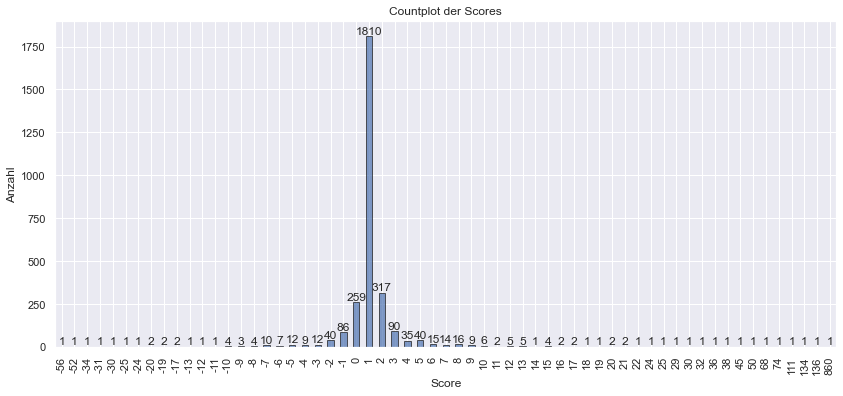

In [89]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die Deleted wurden löschen

In [90]:
df = df[df['body'] != '[deleted]']

In [91]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 42538 entries, 4 to 45463
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   controversiality   42538 non-null  object        
 1   stickied           42538 non-null  object        
 2   body               42538 non-null  object        
 3   link_id            42538 non-null  object        
 4   author             42538 non-null  object        
 5   score              42538 non-null  int64         
 6   author_flair_text  42538 non-null  object        
 7   created_utc        42538 non-null  datetime64[ns]
 8   parent_id          42538 non-null  object        
 9   gilded             42538 non-null  object        
 10  distinguished      42538 non-null  object        
 11  edited             42538 non-null  object        
 12  id                 42538 non-null  object        
 13  created_hour       42538 non-null  int64         
 14  created_day

/r/deadbedrooms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             49
Then why are you still talking to me troll??\n\nStop fucking replying the

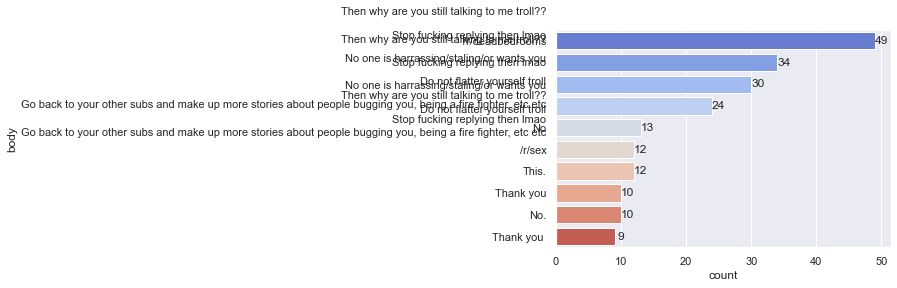

In [92]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:10].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [93]:
df[df['body'] == "."]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
3522,0,0,.,t3_5atdum,ILove_monay,2,0,2016-11-03 00:01:56,t3_5atdum,0,0,1,d9j61ge,0,3,2016
3558,0,0,.,t3_5an0fc,ILove_monay,1,0,2016-11-03 00:53:06,t1_d9j4e4p,0,0,1,d9j8j9a,0,3,2016
3570,0,0,.,t3_5an0fc,ILove_monay,1,0,2016-11-03 01:04:21,t1_d9id965,0,0,1,d9j931m,1,3,2016
7700,0,0,.,t3_5b9fms,ILove_monay,3,0,2016-11-05 22:48:36,t1_d9n0jon,0,0,1,d9nf8k3,22,5,2016
18995,0,0,.,t3_5cqfmf,technog33kboy,1,0,2016-11-13 23:19:49,t3_5cqfmf,0,0,0,d9z27ew,23,13,2016


In [94]:
df = df[df['body'] != '[deleted]']

# Http and Redditnames removes

In [95]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [96]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
713,0,0,/r/deadbedrooms,t3_5aj0ql,alooohaaa,1,0,2016-11-01 14:14:16,t3_5aj0ql,0,0,0,d9gt301,14,1,2016
6228,0,0,/r/deadbedrooms,t3_5b4pkt,alooohaaa,2,0,2016-11-04 18:49:00,t3_5b4pkt,0,0,0,d9lv711,18,4,2016
9441,0,0,/r/deadbedrooms,t3_5bhpii,alooohaaa,0,0,2016-11-07 02:24:15,t3_5bhpii,0,0,0,d9p0mib,2,7,2016
9530,0,0,/r/deadbedrooms,t3_5bjxj6,alooohaaa,1,0,2016-11-07 03:32:32,t3_5bjxj6,0,0,0,d9p3gn9,3,7,2016
10546,0,0,/r/justnomil,t3_5bogu0,rossacre,3,0,2016-11-07 20:24:40,t3_5bogu0,0,0,0,d9q1aez,20,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43300,0,0,/r/deadbedrooms,t3_5fkfrp,alooohaaa,1,0,2016-11-29 19:44:50,t3_5fkfrp,0,0,0,daky0g3,19,29,2016
43692,0,0,/r/sex,t3_5fm3ly,alooohaaa,0,0,2016-11-29 23:45:47,t3_5fm3ly,0,0,0,dal9t77,23,29,2016
44432,0,0,/r/deadbedrooms,t3_5fpi4x,alooohaaa,1,0,2016-11-30 13:37:47,t3_5fpi4x,0,0,0,dalznwt,13,30,2016
44568,0,0,/r/deadbedrooms,t3_5fpu0m,alooohaaa,1,0,2016-11-30 14:57:12,t3_5fpu0m,0,0,0,dam2l3n,14,30,2016


In [97]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [98]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
6906,0,0,http://www.urbandictionary.com/define.php?term...,t3_5b8l7y,mistermorteau,1,0,2016-11-05 07:44:44,t3_5b8l7y,0,0,0,d9mniq6,7,5,2016
13443,0,0,http://i.imgur.com/8rbnIXx.jpg,t3_5c2d92,always_reading,19,0,2016-11-10 01:38:28,t1_d9thmdt,0,0,0,d9tpuc7,1,10,2016
16961,0,0,http://theferrett.livejournal.com/1268014.html,t3_5civaf,frosttenchi,1,0,2016-11-12 13:32:12,t3_5civaf,0,0,0,d9x4ue6,13,12,2016
35385,0,0,http://prntscr.com/dbhmcg,t3_5eo6fd,Braber02,1,0,2016-11-25 03:28:30,t1_dae748v,0,0,0,daen0jz,3,25,2016
45228,0,0,http://www.pornhub.com/view_video.php?viewkey=...,t3_5fmmws,jelbert6969,1,0,2016-11-30 21:13:25,t3_5fmmws,0,0,0,damm16y,21,30,2016
45232,0,0,http://www.pornhub.com/view_video.php?viewkey=...,t3_5fmmws,jelbert6969,1,0,2016-11-30 21:14:26,t1_damkfl8,0,0,0,damm39j,21,30,2016


In [99]:
df = df.drop(selected_rows.index)

In [100]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
1362,0,0,https://www.youtube.com/watch?v=Qd8-IYovLRQ,t3_5ajs2x,I_hate_alot_a_lot,1,0,2016-11-01 20:00:38,t3_5ajs2x,0,0,0,d9haq86,20,1,2016
4164,0,0,https://www.youtube.com/watch?v=NDlQqPB8aXw,t3_5awgkg,the-bum-hammer,1,0,2016-11-03 13:15:55,t3_5awgkg,0,0,0,d9jwai7,13,3,2016
6363,0,0,https://m.youtube.com/watch?v=T_lh5fR4DMA,t3_5b2z0c,321s,-1,0,2016-11-04 20:13:38,t1_d9lgd5x,0,0,0,d9lzj1y,20,4,2016
6364,0,0,https://m.youtube.com/watch?v=T_lh5fR4DMA,t3_5b2z0c,321s,0,0,2016-11-04 20:13:53,t1_d9ldfzi,0,0,0,d9lzjhu,20,4,2016
7353,0,0,https://youtu.be/ZXsQAXx_ao0,t3_5bauui,forty4swagnum,1,0,2016-11-05 17:40:11,t1_d9n222y,0,0,0,d9n2ltu,17,5,2016
7789,0,0,https://youtu.be/ZXsQAXx_ao0,t3_5bchtj,forty4swagnum,1,0,2016-11-06 00:15:51,t3_5bchtj,0,0,0,d9nir2x,0,6,2016
13909,0,0,https://www.youtube.com/watch?v=moSFlvxnbgk,t3_5c75mp,AligatorTears,2,0,2016-11-10 12:04:55,t3_5c75mp,0,0,0,d9u7mvn,12,10,2016
17286,0,0,https://youtu.be/dekkIO61DsA,t3_5cl57i,Lukendless,1,0,2016-11-12 19:40:31,t3_5cl57i,0,0,0,d9xhu5c,19,12,2016
17986,0,0,https://youtu.be/Kas6akz1jWU,t3_5clv7l,ladyfloof,1,0,2016-11-13 06:25:09,t1_d9y67kw,0,0,0,d9y6ab8,6,13,2016
18013,0,0,https://www.youtube.com/watch?v=4fndeDfaWCg,t3_5clv7l,notthepenguin1,1,0,2016-11-13 06:37:26,t1_d9y6lbj,0,0,0,d9y6mwm,6,13,2016


In [101]:
df = df.drop(selected_rows_2.index)

In [102]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
6092,0,0,https://www.reddit.com/r/teenrelationships/,t3_5b4lu8,Digitaldreamer7,4,0,2016-11-04 16:58:20,t3_5b4lu8,0,0,0,d9lphid,16,4,2016
8517,0,0,https://m.reddit.com/wiki/commenting/,t3_5bg1y5,somnodoc,2,0,2016-11-06 14:59:11,t1_d9o6773,0,0,0,d9o6czt,14,6,2016
12472,0,0,https://www.reddit.com/r/BreakUps/comments/1b5...,t3_5bx4jg,tiredtaco,1,0,2016-11-09 04:40:34,t3_5bx4jg,0,0,0,d9s9cwn,4,9,2016
18520,0,0,http://psychcentral.com/lib/symptoms-of-codepe...,t3_5cnht3,Creepella_the_third,1,0,2016-11-13 16:04:45,t3_5cnht3,0,0,0,d9yiqqn,16,13,2016
21800,0,0,http://www.mayoclinic.org/symptoms/vaginal-odo...,t3_5d3wml,technog33kboy,2,0,2016-11-15 19:35:52,t3_5d3wml,0,0,0,da1o4iv,19,15,2016
22867,0,0,https://az616578.vo.msecnd.net/files/2016/02/2...,t3_5d9275,IamTheGoodest,1,0,2016-11-16 14:04:38,t3_5d9275,0,0,0,da2pqe3,14,16,2016
29148,0,0,http://www.introvertedbadass.com/11-simple-but...,t3_5e0oe3,mirkilos,1,0,2016-11-20 23:11:18,t3_5e0oe3,0,0,0,da8rjca,23,20,2016
29428,0,0,http://www.asanet.org/press-center/press-relea...,t3_5e1yul,Pola_Xray,1,0,2016-11-21 04:37:01,t3_5e1yul,0,0,0,da94yvf,4,21,2016
29672,0,0,http://tinybuddha.com/blog/5-ways-to-stop-bein...,t3_5e2hna,Lacy_Drays,1,0,2016-11-21 10:58:20,t3_5e2hna,0,0,0,da9di1m,10,21,2016
32904,0,0,http://www.jconline.com/story/news/crime/2016/...,t3_59vsy8,MjrJWPowell,7,0,2016-11-23 05:16:31,t1_d9c8xdy,0,0,0,dac2jhr,5,23,2016


In [103]:
df.drop(url_only_rows.index, inplace=True)

In [104]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [105]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
1162,0,0,r/madlads,t3_5aiq6c,TooOldForThisShit642,2,0,2016-11-01 18:04:10,t1_d9gr6dz,0,0,0,d9h4obb,18,1,2016
2884,0,0,r/BPDlovedones,t3_5aptdj,Vicky_Vallencourt,2,0,2016-11-02 18:19:59,t1_d9ihyvz,0,0,0,d9ip541,18,2,2016
13143,0,0,r/TheRedPill,t3_5c3760,Askingforafriendta,1,0,2016-11-09 20:51:38,t3_5c3760,0,0,0,d9tct2b,20,9,2016
20969,0,0,r/offmychest,t3_5d0kud,XtobaseB,1,0,2016-11-15 04:15:58,t3_5d0kud,0,0,0,da0um7j,4,15,2016
24403,0,0,r/hailCorporate,t3_5dfop6,Cuck-a-doodle-doo19,4,0,2016-11-17 13:15:12,t3_5dfop6,0,0,0,da44swt,13,17,2016


In [106]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [107]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [108]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [109]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


# Delete Bots

In [110]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [111]:
 df[df['author'] == 'AdviceHelperBot']

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [112]:
 df[df['author'] == 'theHelperdroid']

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [114]:
df[df['author'] == 'theHelperdroid']
'6907'

'6907'

In [115]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_89371/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
6907,0,0,*Here's the Urban Dictionary definition of* [*...,t3_5b8l7y,autourbanbot,3,0,2016-11-05 07:44:50,t1_d9mniq6,0,0,0,d9mnis6,7,5,2016
11395,0,0,&gt; Edit: I noticed right away someone downvo...,t3_5bqoyt,mistermorteau,1,0,2016-11-08 10:32:52,t3_5bqoyt,0,0,0,d9qwbdk,10,8,2016
13910,0,0,"&gt;[**Disney's Frozen ""Let It Go"" Sequence Pe...",t3_5c75mp,youtubefactsbot,1,0,2016-11-10 12:05:43,t1_d9u7mvn,0,0,0,d9u7niq,12,10,2016
14940,0,0,"I'm a bot, *bleep*, *bloop*. Someone has linke...",t3_5caqlb,TotesMessenger,7,0,2016-11-11 01:29:08,t1_d9v144e,0,0,0,d9v7yky,1,11,2016
18015,0,0,&gt;[**Backstreet Boys - I Want It That Way [3...,t3_5clv7l,youtubefactsbot,1,0,2016-11-13 06:37:52,t1_d9y6mwm,0,0,0,d9y6nbn,6,13,2016
18024,0,0,&gt;[**Backstreet Boys - As Long As You Love M...,t3_5clv7l,youtubefactsbot,1,0,2016-11-13 06:42:36,t1_d9y6sew,0,0,0,d9y6shx,6,13,2016
18546,0,0,&gt;[**Bill Burr - There is no reason to hit a...,t3_5cp14l,youtubefactsbot,2,0,2016-11-13 16:36:29,t1_d9yjw6u,0,0,0,d9yjwr8,16,13,2016
19876,0,0,yeah im hoping it gets better soon and there a...,t3_5ctmkb,_Matterhorn_,1,0,2016-11-14 15:07:30,t1_d9zintn,0,0,0,d9zuikj,15,14,2016
22556,0,0,"&gt;[**you are good women, i'm good man [0:18]...",t3_5d7peu,youtubefactsbot,1,0,2016-11-16 06:24:42,t1_da2fy05,0,0,0,da2fy3p,6,16,2016
22558,0,0,"Uh...thank you, Mr. Bot, sir.",t3_5d7peu,GreekDudeYiannis,1,0,2016-11-16 06:25:41,t1_da2fy3p,0,0,0,da2fz1f,6,16,2016


In [118]:
df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_89371/1458018820.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
6907,0,0,*Here's the Urban Dictionary definition of* [*...,t3_5b8l7y,autourbanbot,3,0,2016-11-05 07:44:50,t1_d9mniq6,0,0,0,d9mnis6,7,5,2016
11395,0,0,&gt; Edit: I noticed right away someone downvo...,t3_5bqoyt,mistermorteau,1,0,2016-11-08 10:32:52,t3_5bqoyt,0,0,0,d9qwbdk,10,8,2016
13910,0,0,"&gt;[**Disney's Frozen ""Let It Go"" Sequence Pe...",t3_5c75mp,youtubefactsbot,1,0,2016-11-10 12:05:43,t1_d9u7mvn,0,0,0,d9u7niq,12,10,2016
14940,0,0,"I'm a bot, *bleep*, *bloop*. Someone has linke...",t3_5caqlb,TotesMessenger,7,0,2016-11-11 01:29:08,t1_d9v144e,0,0,0,d9v7yky,1,11,2016
18015,0,0,&gt;[**Backstreet Boys - I Want It That Way [3...,t3_5clv7l,youtubefactsbot,1,0,2016-11-13 06:37:52,t1_d9y6mwm,0,0,0,d9y6nbn,6,13,2016
18024,0,0,&gt;[**Backstreet Boys - As Long As You Love M...,t3_5clv7l,youtubefactsbot,1,0,2016-11-13 06:42:36,t1_d9y6sew,0,0,0,d9y6shx,6,13,2016
18546,0,0,&gt;[**Bill Burr - There is no reason to hit a...,t3_5cp14l,youtubefactsbot,2,0,2016-11-13 16:36:29,t1_d9yjw6u,0,0,0,d9yjwr8,16,13,2016
19876,0,0,yeah im hoping it gets better soon and there a...,t3_5ctmkb,_Matterhorn_,1,0,2016-11-14 15:07:30,t1_d9zintn,0,0,0,d9zuikj,15,14,2016
22556,0,0,"&gt;[**you are good women, i'm good man [0:18]...",t3_5d7peu,youtubefactsbot,1,0,2016-11-16 06:24:42,t1_da2fy05,0,0,0,da2fy3p,6,16,2016
22558,0,0,"Uh...thank you, Mr. Bot, sir.",t3_5d7peu,GreekDudeYiannis,1,0,2016-11-16 06:25:41,t1_da2fy3p,0,0,0,da2fz1f,6,16,2016


In [116]:
import re
indices_to_remove = [0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 20]
bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]




/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_89371/2177442660.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


In [119]:

import re
indices_to_remove = [0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 16, 17, 20]

# Abrufen der Indexwerte der Zeilen in bot_in_body_rows, die gelöscht werden sollen
indices_to_delete = bot_in_body_rows.iloc[indices_to_remove].index
indices_to_delete
# Löschen der Zeilen im Original DataFrame df
df.drop(indices_to_delete, inplace=True)


In [120]:
df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_89371/1458018820.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
11395,0,0,&gt; Edit: I noticed right away someone downvo...,t3_5bqoyt,mistermorteau,1,0,2016-11-08 10:32:52,t3_5bqoyt,0,0,0,d9qwbdk,10,8,2016
19876,0,0,yeah im hoping it gets better soon and there a...,t3_5ctmkb,_Matterhorn_,1,0,2016-11-14 15:07:30,t1_d9zintn,0,0,0,d9zuikj,15,14,2016
22558,0,0,"Uh...thank you, Mr. Bot, sir.",t3_5d7peu,GreekDudeYiannis,1,0,2016-11-16 06:25:41,t1_da2fy3p,0,0,0,da2fz1f,6,16,2016
33334,0,0,"It does, thank you. I was starting to think yo...",t3_5eftf9,serenwipiti,2,0,2016-11-23 14:57:24,t1_dacepix,0,0,0,dacgf5v,14,23,2016
36735,0,0,Who asks for something on Thanksgiving? You kn...,t3_5eunau,dry_freeze,2,0,2016-11-25 22:45:19,t3_5eunau,0,0,0,daflopx,22,25,2016
37498,0,0,"So, when you decided you wanted a sex bot...ho...",t3_5esjib,Newbielurker,3,0,2016-11-26 11:42:04,t1_dag6mp8,0,0,0,dag71g4,11,26,2016
41555,0,0,"From what you're describing, you don't seem to...",t3_5fd244,happy_go_lucky,2,0,2016-11-28 21:13:26,t3_5fd244,0,0,0,dajjb6o,21,28,2016


In [123]:
df_bot=pd.read_csv("bot_names.csv")

In [124]:

df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [125]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [126]:
df_check_bot

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
373,0,0,Not bitter. Can't stand cheaters. So on your b...,t3_5acfgz,alpha_28,2,0,2016-11-01 05:03:55,t1_d9gfpfh,0,0,0,d9ggshs,5,1,2016
821,0,0,"You need to tell her one of two things. ""If yo...",t3_5acpi2,funnyman95,1,0,2016-11-01 15:10:38,t1_d9fewyg,0,0,0,d9gvoxe,15,1,2016
915,0,0,I would not fault you for killing him,t3_58dcn7,funnyman95,1,0,2016-11-01 15:57:21,t3_58dcn7,0,0,0,d9gy2is,15,1,2016
1083,0,0,"&gt;because I still love her, despite her init...",t3_5ajs2x,smacksaw,8,0,2016-11-01 17:22:59,t3_5ajs2x,0,0,0,d9h2ip4,17,1,2016
1539,0,0,I mean what are you going to do in Florida. Yo...,t3_5alt09,goatismycopilot,1,0,2016-11-01 22:03:45,t3_5alt09,0,0,0,d9hgz0u,22,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,0,0,You pretty much arrived at your own conclusion.,t3_5fsofq,goatismycopilot,3,0,2016-11-30 22:36:43,t3_5fsofq,0,0,0,damqhic,22,30,2016
45385,0,0,Why not help her practise interviewing?,t3_5fs3t8,goatismycopilot,4,0,2016-11-30 22:39:35,t3_5fs3t8,0,0,0,damqmra,22,30,2016
45447,0,0,This relationship is dead already. \n\n,t3_5fqerq,serenwipiti,1,0,2016-11-30 23:30:21,t3_5fqerq,0,0,0,damt2o7,23,30,2016
45448,0,0,"No, this is kinda creepy.",t3_5fslof,serenwipiti,1,0,2016-11-30 23:31:45,t3_5fslof,0,0,0,damt51c,23,30,2016


In [133]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[15:17]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
13812,0,0,You need to understand this. The election is *...,t3_5c6rm7,I_am_bot,9,0,2016-11-10 08:57:06,t3_5c6rm7,0,0,0,d9u42jn,8,10,2016
24341,0,0,🌼\n\n^Spot ^a ^problem? [^Contact ^the ^creato...,t3_5ddkhe,flower_bot,0,0,2016-11-17 11:54:34,t1_da42u9d,0,0,0,da42ubw,11,17,2016
25479,0,0,🥀\n\n^Spot ^a ^problem? [^Contact ^the ^creato...,t3_5diaxo,flower_bot,1,0,2016-11-18 04:07:58,t1_da58m5r,0,0,0,da58mjq,4,18,2016
25589,0,0,also thank mr skeltal for good bones and calcium,t3_5dkwze,thank_mr_skeltal_bot,6,0,2016-11-18 06:13:14,t1_da5cqhp,0,0,0,da5cqik,6,18,2016
40352,0,0,**TL;DR:** Type in ¯\\\\\\\_(ツ)\_/¯ for prope...,t3_5f9cv7,Shrugfacebot,5,0,2016-11-28 04:07:39,t1_daik0gi,0,0,0,daik0jy,4,28,2016
42418,0,0,ヽ༼ ຈل͜ຈ༽ ﾉ Raise Them!\n\n ^^Dongers ^^Raised:...,t3_5ff1pn,ayylmao2dongerbot-v2,0,0,2016-11-29 06:58:07,t1_dak89co,0,0,0,dak89gf,6,29,2016
42419,0,0,ヽ༼ ຈل͜ຈ༽ ﾉ Raise Them!\n\n ^^Dongers ^^Raised:...,t3_5ff1pn,ayylmao2dongerbot-v2,0,0,2016-11-29 06:58:07,t1_dak89co,0,0,0,dak89gi,6,29,2016


In [142]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[1]

controversiality                                                     0
stickied                                                             0
body                 🌼\n\n^Spot ^a ^problem? [^Contact ^the ^creato...
link_id                                                      t3_5ddkhe
author                                                      flower_bot
score                                                                0
author_flair_text                                                    0
created_utc                                        2016-11-17 11:54:34
parent_id                                                   t1_da42u9d
gilded                                                               0
distinguished                                                        0
edited                                                               0
id                                                             da42ubw
created_hour                                                        11
create

In [145]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["flower_bot","thank_mr_skeltal_bot","ayylmao2dongerbot-v2"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [148]:
df[df['author'].str.contains("ayylmao2dongerbot-v2")]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [149]:
df[df['author'].str.contains("bot")]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
2251,0,0,"Project a little harder next time, eh? I don't...",t3_5ao1ix,seniorelroboto,1,0,2016-11-02 09:35:08,t1_d9i2xyz,0,0,0,d9i540i,9,2,2016
2254,0,0,"Look, it happens. Especially when you have hit...",t3_5ao1ix,seniorelroboto,1,0,2016-11-02 09:36:56,t3_5ao1ix,0,0,0,d9i551d,9,2,2016
2542,0,0,"It's too late, they're already seen everything!",t3_5ao1pp,NotARobotv2,1,0,2016-11-02 14:44:44,t1_d9i3x8d,0,0,0,d9ie24k,14,2,2016
9476,0,0,When I started where I am two years ago there ...,t3_5bieh3,joebothree,1,0,2016-11-07 02:38:41,t3_5bieh3,0,0,0,d9p18l2,2,7,2016
10387,0,0,Nothing you two broke up what he does isn't of...,t3_5bo12z,joebothree,9,0,2016-11-07 18:59:33,t3_5bo12z,0,0,0,d9pwzlr,18,7,2016
10429,0,0,I was hung up on my ex for awhile and thought ...,t3_5bo12z,joebothree,1,0,2016-11-07 19:21:34,t1_d9pxsuw,0,0,0,d9py3qw,19,7,2016
13812,0,0,You need to understand this. The election is *...,t3_5c6rm7,I_am_bot,9,0,2016-11-10 08:57:06,t3_5c6rm7,0,0,0,d9u42jn,8,10,2016
14842,0,0,About 10 years ago I dated a girl for 2 years....,t3_5cb6xe,Supportbot13,1,0,2016-11-11 00:02:30,t3_5cb6xe,0,0,0,d9v47by,0,11,2016


In [128]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [132]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
19718,0,0,You'd think it's all honkey dory for the chick...,t3_5cuvyc,Lacy_Drays,2,0,2016-11-14 12:46:27,t1_d9zpspx,0,0,0,d9zq3f9,12,14,2016


In [130]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year


In [150]:
df_check_bot[df_check_bot['body'].str.contains('Bot')]

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
27070,0,0,I will be messaging you on [**2017-01-19 01:53...,t3_5cphsu,RemindMeBot,1,0,2016-11-19 01:53:18,t1_da6hbjs,0,0,0,da6hewe,1,19,2016
30487,0,0,":( I'm sorry. \n\nI'd take it as an ""you live ...",t3_5e3kvf,serenwipiti,1,0,2016-11-21 21:07:30,t1_da9yjs3,0,0,0,daa1gb9,21,21,2016
30965,0,0,Spend the holidays with your brother and/or so...,t3_5e62x7,Missmybrother987,1,0,2016-11-22 02:54:52,t3_5e62x7,0,0,0,daagw4r,2,22,2016
31256,0,0,Way too much drama for a 3 month 'relationship...,t3_5e4um7,yourhouseitssideways,2,0,2016-11-22 06:25:02,t3_5e4um7,0,0,0,daaogz8,6,22,2016
42418,0,0,ヽ༼ ຈل͜ຈ༽ ﾉ Raise Them!\n\n ^^Dongers ^^Raised:...,t3_5ff1pn,ayylmao2dongerbot-v2,0,0,2016-11-29 06:58:07,t1_dak89co,0,0,0,dak89gf,6,29,2016
42419,0,0,ヽ༼ ຈل͜ຈ༽ ﾉ Raise Them!\n\n ^^Dongers ^^Raised:...,t3_5ff1pn,ayylmao2dongerbot-v2,0,0,2016-11-29 06:58:07,t1_dak89co,0,0,0,dak89gi,6,29,2016


In [151]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot",]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [154]:
df_check_bot

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year
373,0,0,Not bitter. Can't stand cheaters. So on your b...,t3_5acfgz,alpha_28,2,0,2016-11-01 05:03:55,t1_d9gfpfh,0,0,0,d9ggshs,5,1,2016
821,0,0,"You need to tell her one of two things. ""If yo...",t3_5acpi2,funnyman95,1,0,2016-11-01 15:10:38,t1_d9fewyg,0,0,0,d9gvoxe,15,1,2016
915,0,0,I would not fault you for killing him,t3_58dcn7,funnyman95,1,0,2016-11-01 15:57:21,t3_58dcn7,0,0,0,d9gy2is,15,1,2016
1083,0,0,"&gt;because I still love her, despite her init...",t3_5ajs2x,smacksaw,8,0,2016-11-01 17:22:59,t3_5ajs2x,0,0,0,d9h2ip4,17,1,2016
1539,0,0,I mean what are you going to do in Florida. Yo...,t3_5alt09,goatismycopilot,1,0,2016-11-01 22:03:45,t3_5alt09,0,0,0,d9hgz0u,22,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,0,0,You pretty much arrived at your own conclusion.,t3_5fsofq,goatismycopilot,3,0,2016-11-30 22:36:43,t3_5fsofq,0,0,0,damqhic,22,30,2016
45385,0,0,Why not help her practise interviewing?,t3_5fs3t8,goatismycopilot,4,0,2016-11-30 22:39:35,t3_5fs3t8,0,0,0,damqmra,22,30,2016
45447,0,0,This relationship is dead already. \n\n,t3_5fqerq,serenwipiti,1,0,2016-11-30 23:30:21,t3_5fqerq,0,0,0,damt2o7,23,30,2016
45448,0,0,"No, this is kinda creepy.",t3_5fslof,serenwipiti,1,0,2016-11-30 23:31:45,t3_5fslof,0,0,0,damt51c,23,30,2016


# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("relationship_advise_16_comments_EDA_clean.csv",sep=";")

In [6]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    body  \
0      It takes time but try to think of all the nega...   
1      2017: 5 Do you mean may? Summer North or south...   
2      I wouldn't give her another chance but I'm old...   
3      Relationships are complicated. Everyone paints...   
4      Well, since you realize that she's not really ...   
...                                                  ...   
42406                  That poor woman. You're pathetic.   
42407  Usually, a guy won't propose unless he knows y...   
42408                  Don't give her? How hard is that?   
42409                                     OK, good luck!   
42410  Way different views as some gals don't define ...   

                                              clean_text  
0      It takes time but try to think of all the nega...  
1      Do you mean may Summer North or south hemisphe...  
2      I wouldn t give her another chance but I m old...  
3      Relationships are complicated . Ever

In [8]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [9]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year,clean_text,comment_len
588,0,0,,t3_5aj06n,tindermagic,1,0,2016-11-01 13:28:36,t1_d9gr5gl,0,0,1,d9gr9rf,13,1,2016,,0
600,0,0,,t3_5aj06n,tindermagic,1,0,2016-11-01 13:43:51,t1_d9gree1,0,0,1,d9grun5,13,1,2016,,0
627,0,0,,t3_5aj06n,tindermagic,1,0,2016-11-01 14:01:35,t1_d9gs0uu,0,0,1,d9gsk2f,14,1,2016,,0
697,0,0,,t3_5aj06n,tindermagic,1,0,2016-11-01 14:36:27,t1_d9gsuwx,0,0,1,d9gu2e5,14,1,2016,,0
3354,0,0,;),t3_5as5fc,ieatPILESofSHIT,1,0,2016-11-03 02:48:40,t3_5as5fc,0,0,0,d9je5kh,2,3,2016,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39315,0,0,,t3_5fgakp,GertrudeBeerstein,22,0,2016-11-29 03:46:38,t3_5fgakp,0,0,0,dak1mav,3,29,2016,,0
39343,0,0,:),t3_5f9opb,Pola_Xray,1,0,2016-11-29 04:08:13,t1_dailpf1,0,0,0,dak2kqj,4,29,2016,,0
39374,0,0,α,t3_5ff1pn,jessadactyl,4,0,2016-11-29 04:35:18,t1_dak0fxv,0,0,0,dak3pv7,4,29,2016,,0
41558,0,0,^,t3_5fp1ja,The_Red_Jinx,1,0,2016-11-30 14:50:10,t1_dam08om,0,0,0,dam2adu,14,30,2016,,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42411 entries, 0 to 42410
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   controversiality   42411 non-null  int64 
 1   stickied           42411 non-null  int64 
 2   body               42411 non-null  object
 3   link_id            42411 non-null  object
 4   author             42411 non-null  object
 5   score              42411 non-null  int64 
 6   author_flair_text  42411 non-null  object
 7   created_utc        42411 non-null  object
 8   parent_id          42411 non-null  object
 9   gilded             42411 non-null  int64 
 10  distinguished      42411 non-null  object
 11  edited             42411 non-null  int64 
 12  id                 42411 non-null  object
 13  created_hour       42411 non-null  int64 
 14  created_day        42411 non-null  int64 
 15  created_year       42411 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 5.2

In [10]:
df = df[df['comment_len'] != 0]

# Final EDA

In [11]:
df.info()
#42423

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42327 entries, 0 to 42410
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   controversiality   42327 non-null  int64 
 1   stickied           42327 non-null  int64 
 2   body               42327 non-null  object
 3   link_id            42327 non-null  object
 4   author             42327 non-null  object
 5   score              42327 non-null  int64 
 6   author_flair_text  42327 non-null  object
 7   created_utc        42327 non-null  object
 8   parent_id          42327 non-null  object
 9   gilded             42327 non-null  int64 
 10  distinguished      42327 non-null  object
 11  edited             42327 non-null  int64 
 12  id                 42327 non-null  object
 13  created_hour       42327 non-null  int64 
 14  created_day        42327 non-null  int64 
 15  created_year       42327 non-null  int64 
 16  clean_text         42327 non-null  objec

In [12]:
df.describe()

,controversiality,stickied,score,gilded,edited,created_hour,created_day,created_year,comment_len
count,42327.000000,42327.0,42327.000000,42327.0,42327.000000,42327.000000,42327.000000,42327.0,42327.000000
mean,0.016396,0.0,3.249793,0.0,0.028020,12.817327,15.839700,2016.0,69.418244
std,0.126995,0.0,11.469301,0.0,0.165032,7.216480,8.900065,0.0,84.310554
min,0.000000,0.0,-97.000000,0.0,0.000000,0.000000,1.000000,2016.0,1.000000
25%,0.000000,0.0,1.000000,0.0,0.000000,6.000000,8.000000,2016.0,20.000000
50%,0.000000,0.0,1.000000,0.0,0.000000,15.000000,16.000000,2016.0,43.000000
75%,0.000000,0.0,3.000000,0.0,0.000000,19.000000,24.000000,2016.0,88.000000
max,1.000000,0.0,652.000000,0.0,1.000000,23.000000,30.000000,2016.0,1528.000000


In [13]:
df.head()

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year,clean_text,comment_len
0,0,0,It takes time but try to think of all the nega...,t3_5a94bq,millybilly67,1,0,2016-11-01 00:04:53,t3_5a94bq,0,0,0,d9g59ru,0,1,2016,It takes time but try to think of all the nega...,19
1,0,0,2017: 5 Do you mean may? Summer North or south...,t3_5afw87,passwordistako,2,0,2016-11-01 00:06:13,t3_5afw87,0,0,0,d9g5bql,0,1,2016,Do you mean may Summer North or south hemisphe...,71
2,0,0,I wouldn't give her another chance but I'm old...,t3_5aft7m,kingsmuse,3,0,2016-11-01 00:06:58,t3_5aft7m,0,0,0,d9g5csg,0,1,2016,I wouldn t give her another chance but I m old...,20
3,0,0,Relationships are complicated. Everyone paints...,t3_5acpi2,SunnyChoe,1,0,2016-11-01 00:07:19,t3_5acpi2,0,0,0,d9g5dam,0,1,2016,Relationships are complicated . Everyone paint...,229
4,0,0,"Well, since you realize that she's not really ...",t3_5ab6cw,C-c-c-cuckoldbreaker,1,0,2016-11-01 00:08:00,t1_d9g1ydi,0,0,0,d9g5edr,0,1,2016,Well since you realize that she s not really t...,55


In [14]:
df.tail()

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year,clean_text,comment_len
42406,0,0,That poor woman. You're pathetic.,t3_5fsofq,queenoftheevildead,2,0,2016-11-30 23:44:29,t3_5fsofq,0,0,0,damtq14,23,30,2016,That poor woman . You re pathetic .,8
42407,0,0,"Usually, a guy won't propose unless he knows y...",t3_5ft3h7,evilholographlincoln,2,0,2016-11-30 23:51:17,t3_5ft3h7,0,0,0,damu1a6,23,30,2016,Usually a guy won t propose unless he knows yo...,22
42408,1,0,Don't give her? How hard is that?,t3_5fs6x6,Slyver08,0,0,2016-11-30 23:53:13,t3_5fs6x6,0,0,0,damu4g8,23,30,2016,Don t give her How hard is that,8
42409,0,0,"OK, good luck!",t3_5eticb,CoverYourselfInShit,1,0,2016-11-30 23:57:09,t1_dag66hw,0,0,0,damuavy,23,30,2016,OK good luck,3
42410,0,0,Way different views as some gals don't define ...,t3_5euzvg,udolipixiegal,1,0,2016-11-30 23:57:10,t1_damsqnb,0,0,0,damuaxb,23,30,2016,Way different views as some gals don t define ...,173


# Controversialty

In [16]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    41633
True       694
Name: controversiality, dtype: int64


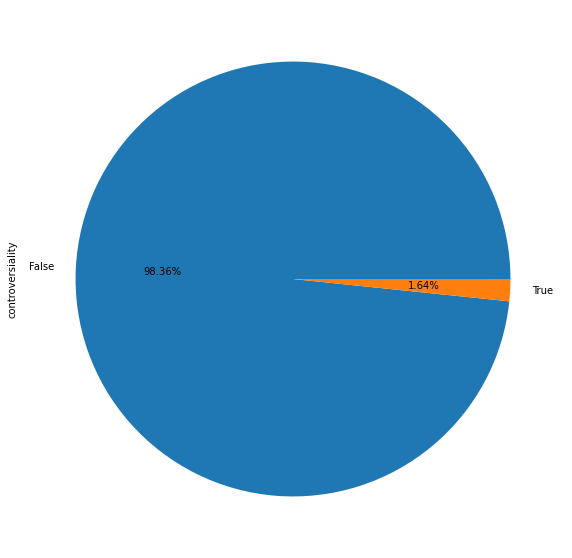

In [17]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [18]:
df['stickied'] = df['stickied'].replace(0,False)

False    42327
Name: stickied, dtype: int64


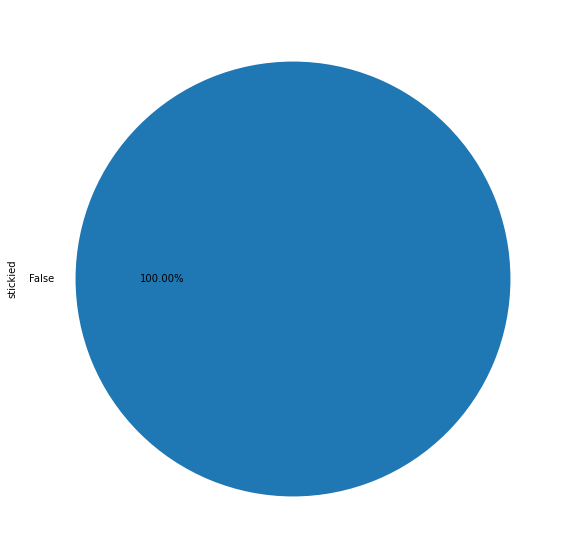

In [19]:

fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["stickied"].value_counts())

# link_id  

t3_5ff1pn    263
t3_5cd8gz    261
t3_5f4luf    243
t3_5esjib    212
t3_5c14eq    197
            ... 
t3_5dgm9a      1
t3_5dgqd4      1
t3_59mn4u      1
t3_5dfz2i      1
t3_5ft3h7      1
Name: link_id, Length: 5259, dtype: int64


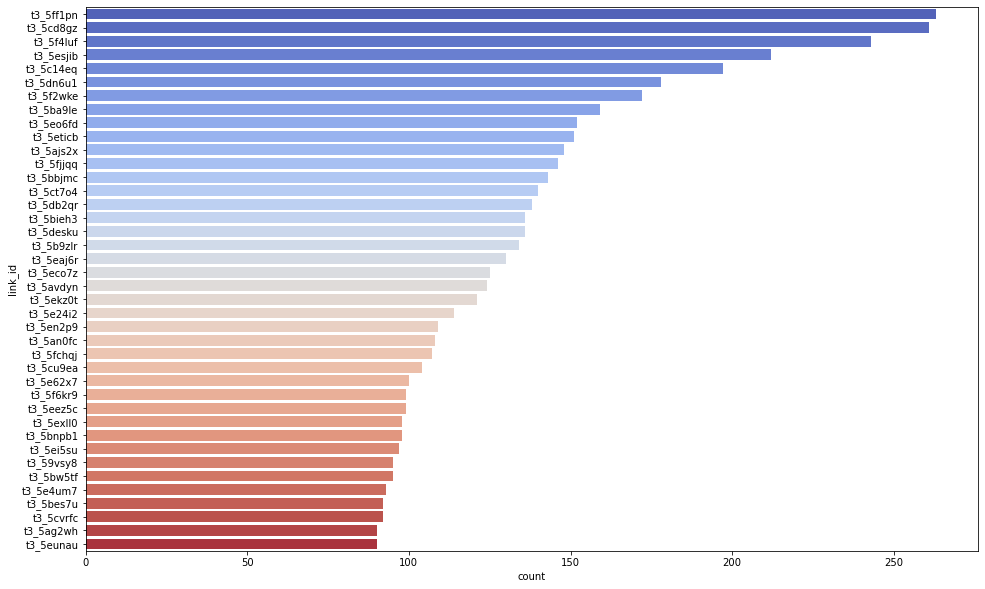

In [20]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [21]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 5259


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

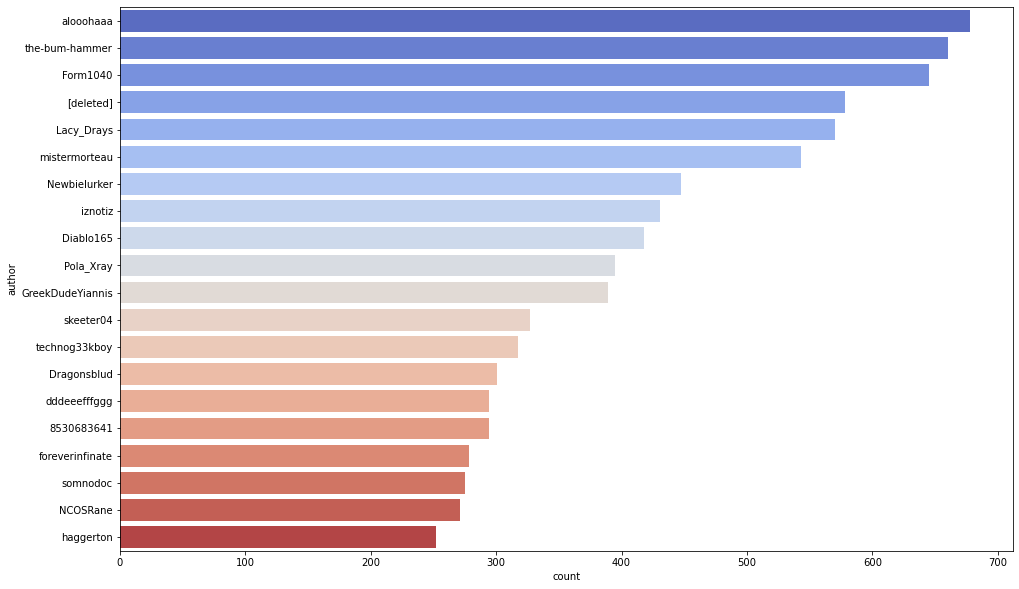

In [22]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

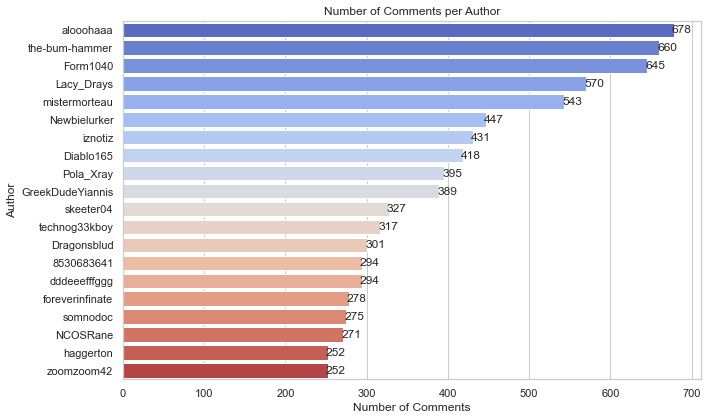

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()




In [24]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 7377


In [25]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 8.05


In [26]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.74


# Hours

([<matplotlib.axis.XTick at 0x7fe521aeb340>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

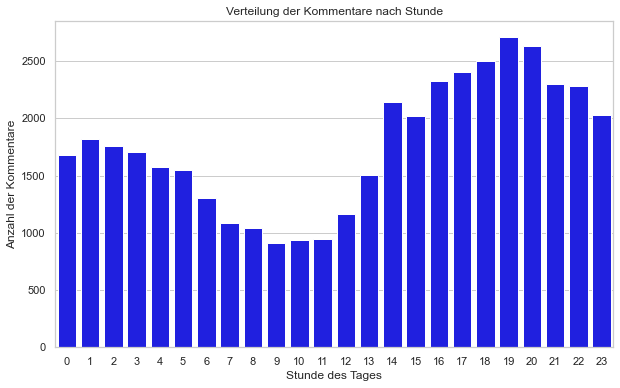

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

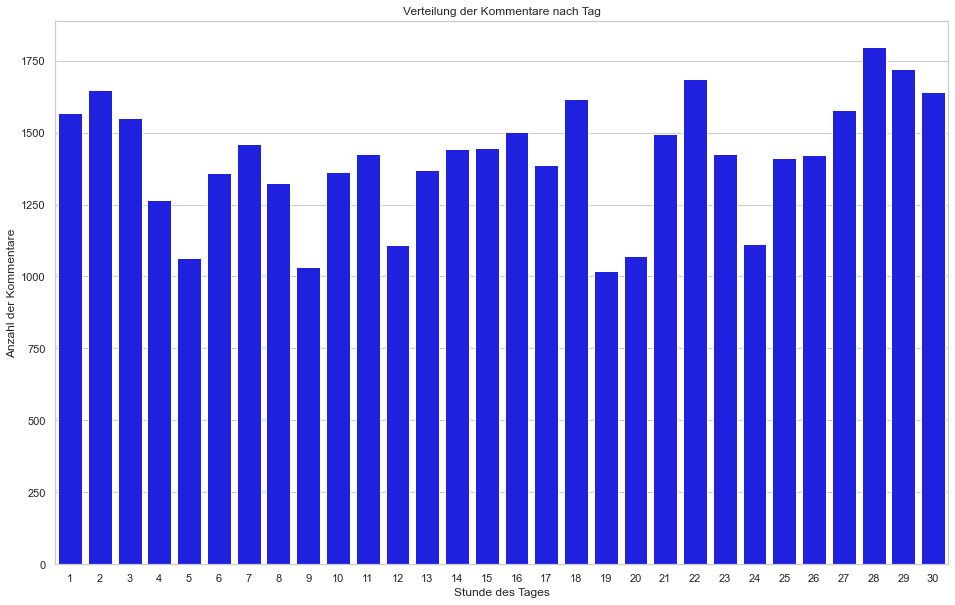

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    42327
Name: gilded, dtype: int64


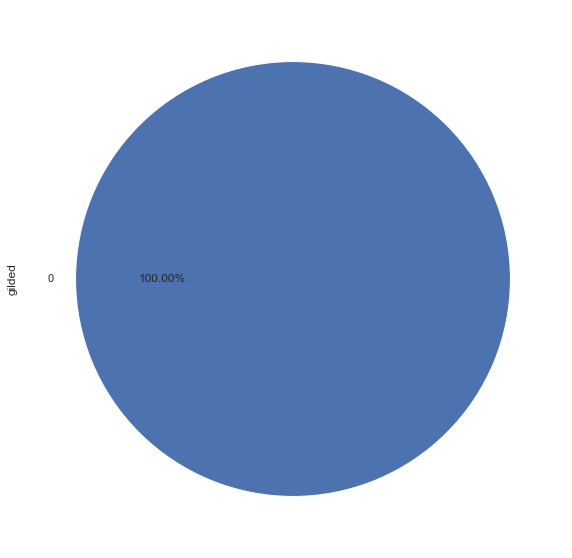

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

# Distinguished

In [30]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        42321
moderator        6
Name: distinguished, dtype: int64


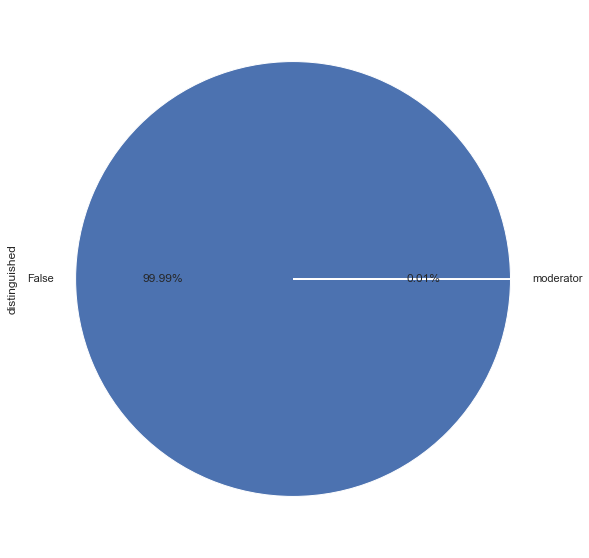

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["distinguished"].value_counts())

# Edited

In [32]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    41141
True      1186
Name: edited, dtype: int64


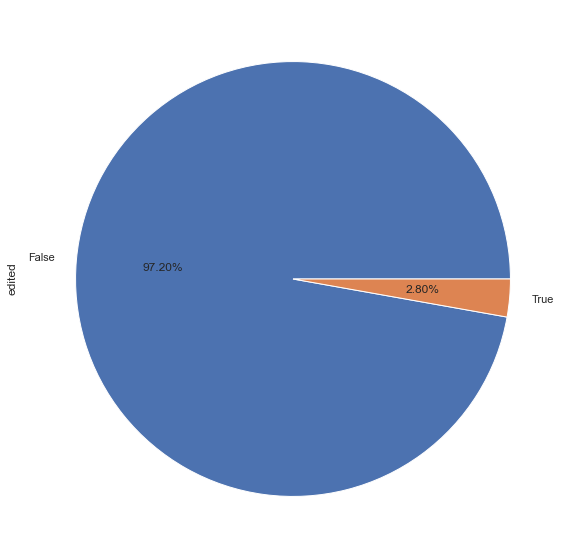

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())
#Überlegung True und False 

# Score

In [34]:
df["score"].mean()

3.2497932761594255

In [35]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year,clean_text,comment_len
14052,False,False,"""These four years have been mostly good."" I'm ...",t3_5cd8gz,justkate2,652,0,2016-11-11 08:36:52,t3_5cd8gz,0,False,False,d9vmgc7,8,11,2016,These four years have been mostly good . I m g...,312
10174,False,False,You'll be ready if and when you're ready. If h...,t3_5br011,Kathryn1962,379,0,2016-11-08 03:57:22,t3_5br011,0,False,False,d9qm6kj,3,8,2016,You ll be ready if and when you re ready . If ...,34
24128,False,False,What the fuck. Ditch the bitch is the only cor...,t3_5dn6u1,zachary333,365,0,2016-11-18 16:14:36,t3_5dn6u1,0,False,False,da5s8mw,16,18,2016,What the fuck . Ditch the bitch is the only co...,41
11654,False,False,"I know you want to blame the guy, but at the e...",t3_5c14eq,Clearly_Im_lying,341,0,2016-11-09 13:51:43,t3_5c14eq,0,False,False,d9ssvho,13,9,2016,I know you want to blame the guy but at the en...,151
31565,False,False,"I rarely use the mod tag, but I wanted to add ...",t3_5eez5c,PreviouslySaydrah,341,"Former victim advocate, CASA-in-training",2016-11-23 21:23:42,t3_5eez5c,0,moderator,False,dacyqad,21,23,2016,I rarely use the mod tag but I wanted to add s...,1420
17842,False,False,this is a sign of things to come.. proposed to...,t3_5cu9ea,prettiwylde,335,0,2016-11-14 05:09:45,t3_5cu9ea,0,False,False,d9zgn2d,5,14,2016,this is a sign of things to come .. proposed t...,29
27449,False,False,I'm thinking of what I can write to you and it...,t3_5e24i2,Aquagenie,294,0,2016-11-21 08:14:41,t3_5e24i2,0,False,True,da9ar10,8,21,2016,I m thinking of what I can write to you and it...,138
12830,False,False,So your girlfriend let your brother feel her u...,t3_5c7ngq,mytummyaches,285,0,2016-11-10 13:07:01,t3_5c7ngq,0,False,False,d9u96na,13,10,2016,So your girlfriend let your brother feel her u...,35
11658,False,False,You shouldnt have given her warning that you s...,t3_5c14eq,Tinycowz,274,0,2016-11-09 14:02:00,t3_5c14eq,0,False,False,d9st8u2,14,9,2016,You shouldnt have given her warning that you s...,75
5555,False,False,And when he gets upset he yells at me for hour...,t3_5b4khm,sassy_malassy,266,0,2016-11-04 16:55:33,t3_5b4khm,0,False,False,d9lpc8t,16,4,2016,And when he gets upset he yells at me for hour...,94


In [36]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,controversiality,stickied,body,link_id,author,score,author_flair_text,created_utc,parent_id,gilded,distinguished,edited,id,created_hour,created_day,created_year,clean_text,comment_len
11748,False,False,I respectfully disagree. OP's girlfriend didn'...,t3_5c14eq,lodro,-97,0,2016-11-09 15:35:55,t1_d9ssvho,0,False,False,d9sx594,15,9,2016,I respectfully disagree . OP s girlfriend didn...,37
25513,False,False,So rewarding her is your way to make her speak...,t3_5ds53i,mistermorteau,-63,0,2016-11-19 15:25:55,t1_da6wvwk,0,False,False,da703kv,15,19,2016,So rewarding her is your way to make her speak...,27
14028,False,False,You are really confused that he didnt like hav...,t3_5cd8gz,chunk_funky,-59,0,2016-11-11 07:55:25,t3_5cd8gz,0,False,False,d9vljrr,7,11,2016,You are really confused that he didnt like hav...,51
29926,False,False,Then don't judge your boyfriend for his action...,t3_5eco7z,Ulfgar_Torunn,-45,0,2016-11-22 20:21:09,t1_dabfi3x,0,False,False,dabg0na,20,22,2016,Then don t judge your boyfriend for his action...,80
6585,True,False,Yeah dude waitresses and waiters in general ar...,t3_5ba9le,definitelytotes,-42,0,2016-11-05 15:40:54,t1_d9mwnyf,0,False,False,d9mxnbc,15,5,2016,Yeah dude waitresses and waiters in general ar...,65
14872,False,False,I've built a life with this man lol. Dumping h...,t3_5cg7cy,hml4easonn,-40,0,2016-11-11 21:03:50,t1_d9w9965,0,False,False,d9wckb5,21,11,2016,I ve built a life with this man lol . Dumping ...,19
26485,False,False,"I don't mind having an std because I love her,...",t3_5dxy43,cookmyfoodonly,-39,0,2016-11-20 13:24:59,t1_da84gbq,0,False,False,da84k69,13,20,2016,I don t mind having an std because I love her ...,21
35743,False,False,"are you new here? Because, over in this corner...",t3_5f2s79,anotherswingingdick,-38,0,2016-11-27 02:10:39,t3_5f2s79,0,False,False,dah2gfn,2,27,2016,are you new here Because over in this corner o...,48
37297,False,False,Nothing you did ever led him to hit you. Your...,t3_5f6l58,branfip82,-38,0,2016-11-28 00:35:09,t1_dahxyj0,0,False,False,daiaweo,0,28,2016,Nothing you did ever led him to hit you . Your...,36
1651,False,False,Dating a 16 year old is legal in most places. ...,t3_5an0fc,branfip82,-37,0,2016-11-02 01:28:11,t1_d9hpc3e,0,False,False,d9hqpb3,1,2,2016,Dating a year old is legal in most places . No...,26


# Score vs hour on Comemnts


<AxesSubplot:xlabel='created_hour', ylabel='score'>

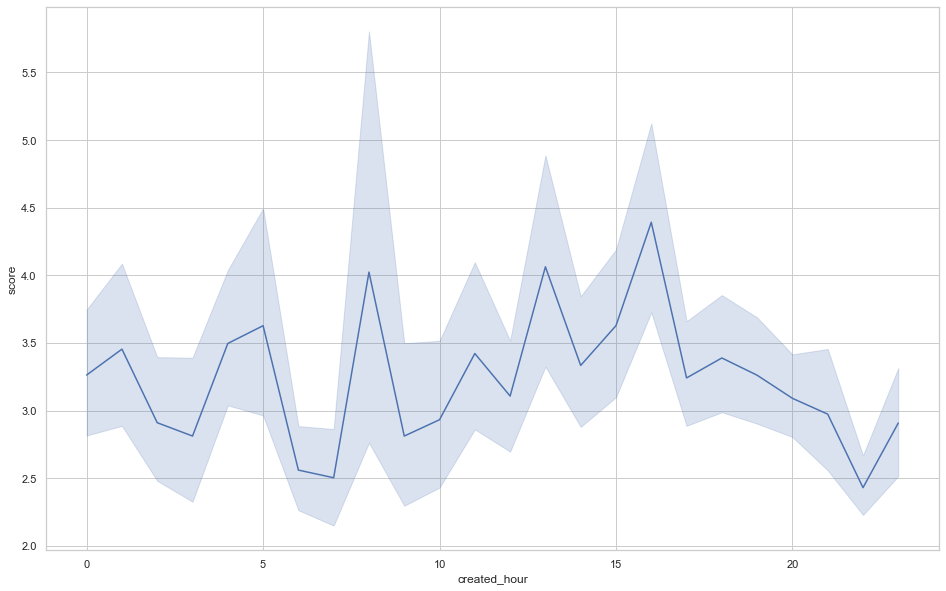

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

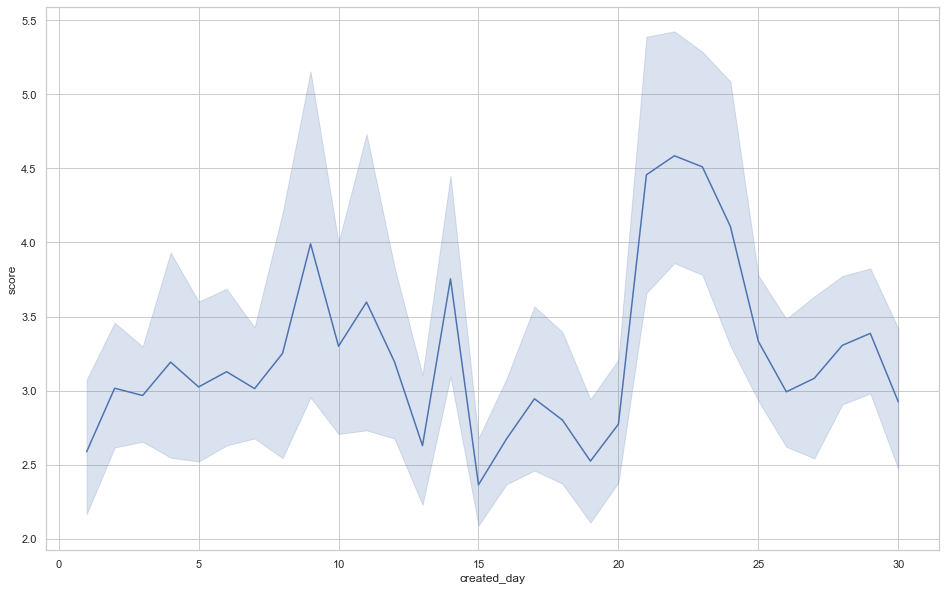

In [38]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

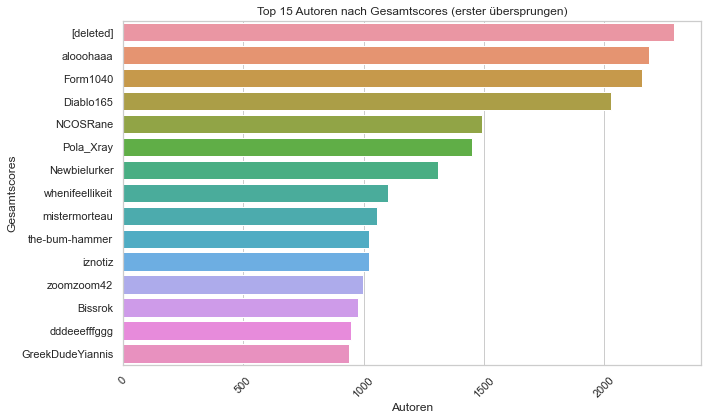

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


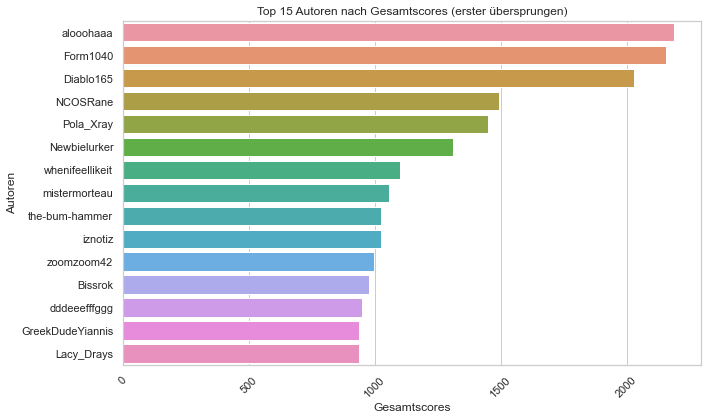

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel("Gesamtscores")
plt.ylabel("Autoren")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
df.describe()

,score,gilded,created_hour,created_day,created_year,comment_len
count,42327.000000,42327.0,42327.000000,42327.000000,42327.0,42327.000000
mean,3.249793,0.0,12.817327,15.839700,2016.0,69.418244
std,11.469301,0.0,7.216480,8.900065,0.0,84.310554
min,-97.000000,0.0,0.000000,1.000000,2016.0,1.000000
25%,1.000000,0.0,6.000000,8.000000,2016.0,20.000000
50%,1.000000,0.0,15.000000,16.000000,2016.0,43.000000
75%,3.000000,0.0,19.000000,24.000000,2016.0,88.000000
max,652.000000,0.0,23.000000,30.000000,2016.0,1528.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42327 entries, 0 to 42410
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   controversiality   42327 non-null  bool  
 1   stickied           42327 non-null  bool  
 2   body               42327 non-null  object
 3   link_id            42327 non-null  object
 4   author             42327 non-null  object
 5   score              42327 non-null  int64 
 6   author_flair_text  42327 non-null  object
 7   created_utc        42327 non-null  object
 8   parent_id          42327 non-null  object
 9   gilded             42327 non-null  int64 
 10  distinguished      42327 non-null  object
 11  edited             42327 non-null  bool  
 12  id                 42327 non-null  object
 13  created_hour       42327 non-null  int64 
 14  created_day        42327 non-null  int64 
 15  created_year       42327 non-null  int64 
 16  clean_text         42327 non-null  objec

# Save cleaned general data

In [43]:
df.to_csv("relationship_advise_16_comments_EDA_clean.csv",index=False,sep=";")

In [44]:
import pandas as pd
test_author=pd.read_csv("relationship_advise_16_comments_EDA_clean.csv",sep=";")
print("Anzahl der Authoren==",test_author['author'].nunique())

Anzahl der Authoren== 7378


In [45]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   controversiality   42327 non-null  bool  
 1   stickied           42327 non-null  bool  
 2   body               42327 non-null  object
 3   link_id            42327 non-null  object
 4   author             42327 non-null  object
 5   score              42327 non-null  int64 
 6   author_flair_text  42327 non-null  object
 7   created_utc        42327 non-null  object
 8   parent_id          42327 non-null  object
 9   gilded             42327 non-null  int64 
 10  distinguished      42327 non-null  object
 11  edited             42327 non-null  bool  
 12  id                 42327 non-null  object
 13  created_hour       42327 non-null  int64 
 14  created_day        42327 non-null  int64 
 15  created_year       42327 non-null  int64 
 16  clean_text         42327 non-null  objec

In [46]:
test_author.describe()

,score,gilded,created_hour,created_day,created_year,comment_len
count,42327.000000,42327.0,42327.000000,42327.000000,42327.0,42327.000000
mean,3.249793,0.0,12.817327,15.839700,2016.0,69.418244
std,11.469301,0.0,7.216480,8.900065,0.0,84.310554
min,-97.000000,0.0,0.000000,1.000000,2016.0,1.000000
25%,1.000000,0.0,6.000000,8.000000,2016.0,20.000000
50%,1.000000,0.0,15.000000,16.000000,2016.0,43.000000
75%,3.000000,0.0,19.000000,24.000000,2016.0,88.000000
max,652.000000,0.0,23.000000,30.000000,2016.0,1528.000000


In [47]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42327 entries, 0 to 42326
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   controversiality   42327 non-null  bool  
 1   stickied           42327 non-null  bool  
 2   body               42327 non-null  object
 3   link_id            42327 non-null  object
 4   author             42327 non-null  object
 5   score              42327 non-null  int64 
 6   author_flair_text  42327 non-null  object
 7   created_utc        42327 non-null  object
 8   parent_id          42327 non-null  object
 9   gilded             42327 non-null  int64 
 10  distinguished      42327 non-null  object
 11  edited             42327 non-null  bool  
 12  id                 42327 non-null  object
 13  created_hour       42327 non-null  int64 
 14  created_day        42327 non-null  int64 
 15  created_year       42327 non-null  int64 
 16  clean_text         42327 non-null  objec

False    42327
Name: stickied, dtype: int64


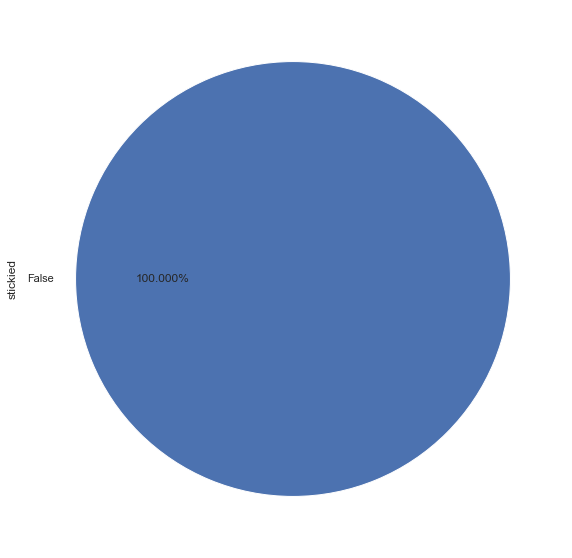

In [48]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
test_author["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(test_author["stickied"].value_counts())